# AC209B - FINAL PROJECT
# MILESTONE 2 - EDA and Naive Model

# Abstract

# 1 Introduction

Since images accounts for 90\% of all medical data [1], healthcare is a field in which computer vision can provide significant benefits. One particularly popular application is using computer vision to perform diagnosis of X-ray images and detect diseases. In this project, we will build a model to predict common thorax diseases and pathologies using a large-scale database of chest X-ray images, ChestX-ray14 [2] . To do this, we will start from pre-trained image classification models and work on fine tuning model parameters. The focus of our project will be on designing an effective loss reweighing scheme to address the heavy class imbalance problem in the dataset. We plan to explore the evaluation our model performance at the macro level and class-level using difference metrics and model diagnostics tool such as saliency maps.



[1] Personalizing medicine through hybrid imaging and medical big data analysis. Lazlo Papp. https://www.frontiersin.org/articles/10.3389/fphy.2018.00051/full

[2] Xiaosong Wang, Yifan Peng, Le Lu, Zhiyong Lu, Mohammadhadi Bagheri, and Ronald M.
Summers. Chestx-ray8: Hospital-scale chest x-ray database and benchmarks on weakly-
supervised classification and localization of common thorax diseases. 2017 IEEE Conference
on Computer Vision and Pattern Recognition (CVPR), Jul 2017.

## 1.1 Motivation

We aim to predict if a patient has a disease or multiple diseases from the patient's X-ray. In a clinical setting, clinicians would order X-rays to be taken to evaluate a particular health issue. When the X-rays shows irregularities, they are limited in what they are able to display. As an example, muscles and ligaments do not show up very well on an X-ray scan. If the X-ray is inconclusive, doctors may warrant additional test. 

Our study aims to automate the process of predicting presence of diseasess and also the specifc disease from an X-ray. We hope to supplement the provide clinicians with a reference when determining irregularities. In particular, we hope to discover previously unknown irregularities from an X-ray that could predict diseases that may not be obvious to a human eye.  



## 1.2 Literature review

In the realm of radio-logical examinations, X-ray is a common screening process to utilize in screening for diagnosis of several lung diseases. Such images are rich of information and could be so valuable in training deep learning methods. In this sense, [2]'s contributions has been revolutionising for the field of medical imaging and deep learning. [2]'s contribution consists of the first large scale chest X-ray dataset, which initially was called 'ChestX-ray8' as it contained eight disease image labels but then was relabelled to 'ChestX-ray14'  for fourteen diseases.

`ChestX-ray8' comprised of 108,948 frontal-view X-ray images of 32,717 unique patients with eight diseases: Mass, Nodule, Pneumonia, Pneumothorax, Infiltration, Effusion, Cardiomegaly and Atelectasis. Some patients could have one disease, multiple diseases or no disease. Out of these images, 983 images have been annotated with a box from the doctor assessing the patient and annotated in the picture where the disease is. In these 983 images there are 1600 annotated boxes but this information has not been used in the training process but rather only at testing. 

As architecture, [2] proposed to use four popular architectures (AlexNet [3], GoogLeNet [4], VGGNet-16 [5] and ResNet-50 [6]) with pretrained weights trained on the Imagenet dataset [7]. On these, they performed network surgery in leaving out the fully connected layers and the final classification layers. Instead of these, they replace these by adding a transition layer, a global pooling layer, a prediction layer and a loss layer. Only the transition layers and the prediction layers are hence trained from scratch, whereas the rest of the model uses the pretrained weights and fine tunes them with the new current dataset. 

Given the imbalance of the dataset, namely that 84,312 images had no findings of any disease in the dataset, they utilized a re-weighted cross entropy loss. Furthermore, given that some patients might have more than a disease, they implement these architectures to be multi-label architectures - meaning, each image is labeled to be a one hot encoding vector of zeros of length eighth (for eighth diseases, if healthy then it will be all zeros), where one appears in the disease found. With this structure, if multiple diseases are predicted, the output vector will be a eighth-length vector with multiple ones where those disease are found, and zero elsewhere.

[2] utilizes their global pooling layer and prediction layer for two tasks: classification and heat-map generation. The intent is not only to determine a diagnosis, but to also highlight where the disease is on the X-ray image. Where the saliency map passes a threshold chosen, they create bounding box around the most intense area of the heat-map, and compare it to the 983 images which have a ground truth box. The information of the boxes is hence used only in testing and in evaluation with  the IoBB (Intersection over the detected B-Box area ratio) metric, not in training. To evaluate the classification in the testing dataset, they utilize ROC curves and AUC values for each of the four implemented models.

Further work has been made possible because of this dataset, namely CheXNeXt. Given this dataset, [8] has trained an architecture that far exceeds the accuracies of [2]. In [8], more than one disease has been correctly classified in testing with AUC values around 90\%, and most of them perform at around 80\%. Only three out of fourteen diseases have a classification AUC between 70\% to 80\% in the CheXNeXt model. On the other hand, none of the classification AUC from [2] exceeded 81\%  for any disease across any architecture but reached rather mostly around 50\%, 60\% or 70\% at the most.

CheXNeXt achieves such impressive results by separating their structure in two steps. The first consists in relabelling the dataset, due to partially incorrect labels in the ChestX-ray 14 dataset. The relabelling has been done by an ensemble of NNets where the classification threshold has been set by the highest F1 score. In the second step, they train new networks (they chose a Denset architecture [9] of 121-layers pretrained on Imagenet [7]) on the relabeled training dataset - this led to an ensamble of 10 networks where the final predictions are the average of the prediction of each network . Also CheXNeXt utilizes a re-weighted loss due to the dataset imbalance, namely they utilize a per-class weighted binary cross entropy loss.

[2] Chestx-ray8: Hospital-scale chest x-ray database and benchmarks on weakly-supervised classification and localization of common thorax diseases.Xiaosong Wang. https://arxiv.org/abs/1705.02315 

[3] Imagenet classification with deep
convolutional neural networks. ALex Krizhevsky. https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf 

[4] Going deeper with convolutions. Christian Szegedy. https://arxiv.org/abs/1409.4842 

[5] Very deep convolutional networks for large-scale image recognition. Karen Simonyan. https://arxiv.org/abs/1409.1556 

[6] Deep residual learning for image recognition. Kaiming He. https://arxiv.org/abs/1512.03385 

[7] Imagenet: A large-scale hierarchical image database. Jia Deng. https://image-net.org/static_files/papers/imagenet_cvpr09.pdf 

[8] Deep learning for chest radiograph diagnosis: A retrospective comparison of the chexnext algorithm to practicing radiologists. Pranav Rajpurkar. https://pubmed.ncbi.nlm.nih.gov/30457988/ 

[9] Densely connected convolutional networks. Gao Huang. https://arxiv.org/abs/1608.06993 

# 2 Data description & processing

The original dataset is comprised of 112120 images of size (1024, 1024, 3), with 86524 train/validation images, and 25596 test images. For computational feasibility, we resized the images to (256, 256, 3), and then saved and zipped the files to save disk space, to avoid potential mounting issues from Google Drive onto Colab.

## Mouting drive and imports

In [ ]:
pip install iterative-stratification

In [ ]:
# Imports
import os
import time
import re
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import matplotlib.cm as cm
%matplotlib inline

# Tensorflow
import tensorflow as tf
from tensorflow.python.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping

# sklearn
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, roc_curve, auc

from sklearn.utils import indexable, _safe_indexing
from sklearn.utils.validation import _num_samples
from sklearn.model_selection._split import _validate_shuffle_split
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import make_multilabel_classification

# others
from itertools import chain
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit

# Load data from Google Drive
import gdown

In [ ]:
# Enable/Disable Eager Execution
# Reference: https://www.tensorflow.org/guide/eager
# TensorFlow's eager execution is an imperative programming environment that evaluates operations immediately, 
# without building graphs

#tf.compat.v1.disable_eager_execution()
#tf.compat.v1.enable_eager_execution()

print("tensorflow version", tf.__version__)
print("keras version", tf.keras.__version__)
print("Eager Execution Enabled:", tf.executing_eagerly())

# Get the number of replicas 
strategy = tf.distribute.MirroredStrategy()
print("Number of replicas:", strategy.num_replicas_in_sync)

devices = tf.config.experimental.get_visible_devices()
print("Devices:", devices)
print(tf.config.experimental.list_logical_devices('GPU'))

print("GPU Available: ", tf.config.list_physical_devices('GPU'))
print("All Physical Devices", tf.config.list_physical_devices())

# Better performance with the tf.data API
# Reference: https://www.tensorflow.org/guide/data_performance
AUTOTUNE = tf.data.experimental.AUTOTUNE

tensorflow version 2.8.0
keras version 2.8.0
Eager Execution Enabled: True
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Number of replicas: 1
Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[LogicalDevice(name='/device:GPU:0', device_type='GPU')]
GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
All Physical Devices [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
!nvidia-smi

Sat May  7 19:56:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    34W / 250W |    377MiB / 16280MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
% cd /content/drive/MyDrive/data_209b_project/
! ls /content/drive/MyDrive/data_209b_project/

In [ ]:
# !tar -xvf /content/drive/MyDrive/data_209b_project/images_small_train_val.tar

## EDA

In [ ]:
def print_data_info(name, df):
  print("##############################################")
  print(name)
  display(df.head())
  print("")
  print("No. of obs: ", len(df))
  print("No. of columns: ", len(df.columns), "\n")
  print(df.dtypes)

In [ ]:
# train-validation list
train_val_list = pd.read_csv('train_val_list.txt', header=None, names=['index'])

# load label data - training and validation only
labels = pd.read_csv('Data_Entry_2017_v2020.csv')
labels = labels[labels['Image Index'].isin(train_val_list['index'])]
labels = labels.rename(columns={'OriginalImage[Width':'Width','Height]':'Height','OriginalImagePixelSpacing[x':'SpacingX','y]':'SpacingY'})
print_data_info("LABELS", labels)

# load boxes data - not in training-validation set - should we even touch?
boxes = pd.read_csv('BBox_List_2017.csv')
boxes = boxes.rename(columns={'Bbox [x':'BboxX', 'y': 'BboxY', 'w':'BboxW', 'h]':'BboxH'})
print_data_info("BBOXES", boxes)

##############################################
LABELS


Image Index          Finding Labels  Follow-up #  Patient ID  \
0   00000001_000.png            Cardiomegaly            0           1   
1   00000001_001.png  Cardiomegaly|Emphysema            1           1   
2   00000001_002.png   Cardiomegaly|Effusion            2           1   
3   00000002_000.png              No Finding            0           2   
12  00000004_000.png             Mass|Nodule            0           4   

    Patient Age Patient Gender View Position  Width  Height  SpacingX  \
0            57              M            PA   2682    2749     0.143   
1            58              M            PA   2894    2729     0.143   
2            58              M            PA   2500    2048     0.168   
3            80              M            PA   2500    2048     0.171   
12           82              M            AP   2500    2048     0.168   

    SpacingY  
0      0.143  
1      0.143  
2      0.168  
3      0.171  
12     0.168


No. of obs:  86524
No. of columns:  11 

Image Index        object
Finding Labels     object
Follow-up #         int64
Patient ID          int64
Patient Age         int64
Patient Gender     object
View Position      object
Width               int64
Height              int64
SpacingX          float64
SpacingY          float64
dtype: object
##############################################
BBOXES


Image Index Finding Label       BboxX       BboxY       BboxW  \
0  00013118_008.png   Atelectasis  225.084746  547.019217   86.779661   
1  00014716_007.png   Atelectasis  686.101695  131.543498  185.491525   
2  00029817_009.png   Atelectasis  221.830508  317.053115  155.118644   
3  00014687_001.png   Atelectasis  726.237288  494.951420  141.016949   
4  00017877_001.png   Atelectasis  660.067797  569.780787  200.677966   

        BboxH  Unnamed: 6  Unnamed: 7  Unnamed: 8  
0   79.186441         NaN         NaN         NaN  
1  313.491525         NaN         NaN         NaN  
2  216.949153         NaN         NaN         NaN  
3   55.322034         NaN         NaN         NaN  
4   78.101695         NaN         NaN         NaN


No. of obs:  984
No. of columns:  9 

Image Index       object
Finding Label     object
BboxX            float64
BboxY            float64
BboxW            float64
BboxH            float64
Unnamed: 6       float64
Unnamed: 7       float64
Unnamed: 8       float64
dtype: object


### EDA: Investigate Patient ID and Finding Labels variables
First, we want to take a closer look athe the Patient ID and Finding Labels variables to see how the dataset is organized

* Data consists of XRay images from 30,805 patients.
* Each patient has on average 3.64 images in the data, ranging from 1 per patient to 184. Each follow-up visit correspond to one image for each patient.

In [ ]:
# count number of patients in data
print("Number of unique patients in data set: ", len(labels['Patient ID'].unique()))
print("Number of images in data set: ", len(labels))
perpatient = labels.groupby('Patient ID',as_index=False).size()
print(f"Average no. of images per patient: {perpatient['size'].mean(): .2f}")
print(f"Patients has {perpatient['size'].min()} - {perpatient['size'].max()} images")

Number of unique patients in data set:  28008
Number of images in data set:  86524
Average no. of images per patient:  3.09
Patients has 1 - 109 images


* Diagnosis labels might contain a single label, or a combination of multiple labels.
  * 81.45% of observations has single label, 18.55% has multiple labels.
* Two potential way to deal with this issue:
  * Restrict model to predict on single label images only
  * Consider all images.

* For the purpose of EDA, we'll create two datasets, one with single label and one with all data, so that we can explore both.
  * We need to turn label into one-hot-encoded arrays to accommodate both dataset format.
  * This means that for the dataset containing all images, we'll have a one-hot-encoded array of 15 columns.

In [ ]:
# number of images with multiple labels
single, single_p = len(labels[~labels['Finding Labels'].str.contains('|', regex=False)]), len(labels[~labels['Finding Labels'].str.contains('|', regex=False)])/len(labels)
multi, multi_p = len(labels[labels['Finding Labels'].str.contains('|', regex=False)]), len(labels[labels['Finding Labels'].str.contains('|', regex=False)])/len(labels)
print(f"Images with single label: {single} ({100*single_p: .2f}%)")
print(f"Images with multiple label:s {multi} ({100*multi_p: .2f}%)")

# list of all unique labels
label_list = "|".join([i for i in labels['Finding Labels'].unique()])
label_list = set(label_list.split("|"))
print(f"Number of unique labels: {len(label_list)}")

Images with single label: 73471 ( 84.91%)
Images with multiple label:s 13053 ( 15.09%)
Number of unique labels: 15


* Turn Finding Labels column into one-hot-encoded array and create 2 dataframes

In [ ]:
# function to one-hot-encode and return dataset with desired set of observation
def one_hot_encode_label(df=labels, label_type='all', label_col='Finding Labels'):
  """ Return data from with one-hot-encoded labels
  """
  out = df.copy()
  label_list = "|".join([i for i in labels['Finding Labels'].unique()])
  label_list = set(label_list.split("|"))
  for i in label_list:
    col_name = "label_" + i
    out[col_name] = df[label_col].str.contains(i)
  out['count_label'] = out[["label_"+i for i in label_list]].sum(axis=1)
  if label_type=='single':
    return out[out['count_label'] == 1]
  elif label_type=='multi':
    return out[out['count_label'] > 1]
  elif label_type=='all':
    return out

In [ ]:
labels_all = one_hot_encode_label()
labels_single = one_hot_encode_label(df=labels, label_type='single')

### EDA: Distribution of Labels
Next, we want to see the proportion of each label in the dataset.

* From the plot below, we can see there the data is heavily imbalanced. The vast majority of the images are labeled "No Finding", which suggest that most of the images in our data does not exhibit any symtom of images. 
* This is something that we should take into account in our modeling, through a reweighting scheme. 

In [ ]:
# create frequency tables of images by labels using "one-hot-encoded" dataset
def frequency_table(df):
  label_cols = [i for i in df.columns if "label_" in i]
  d = {'Label': [i[6:] for i in label_cols], 
       'No. of Images': [df[i].sum() for i in label_cols], 
       'Percent of Images': [100*df[i].sum()/len(df) for i in label_cols]}
  return pd.DataFrame(data=d) 

def barplot_freq(df, var, ax):
    data = df.sort_values(by='Percent of Images',ascending=False)
    cmap = plt.cm.get_cmap('tab20', len(data))
    for c,(w,x,y) in enumerate(zip(data[var], data['No. of Images'], data['Percent of Images'])):
        ax.bar(w, x+4, width=0.5, edgecolor='black', color = cmap(c), align = 'center', alpha = 0.5, label = w)
        ax.text(w,x, str(round(y)) + '%', ha='center', fontsize=12)
    ax.grid(axis='y')
    ax.xaxis.set_visible(False)
    #ax.set_title(var, fontsize=15)
    ax.set_ylabel("No. of images")
    ax.legend(ncol=2, fontsize=10)
    
    return ax 

def barplot(df, var, ax):
  gender = df.groupby([var], as_index=False).size()
  gender['pct'] = 100*gender['size']/gender['size'].sum()
  cmap = plt.cm.get_cmap('tab20', len(gender))
  for c,(w,x,y) in enumerate(zip(gender[var], gender['size'], gender['pct'])):
      ax.bar(w, x+4, width=0.5, edgecolor='black', color = cmap(c), align = 'center', alpha = 0.5, label = w)
      ax.text(w,x, str(round(y)) + '%', ha='center', fontsize=12)
  ax.grid(axis='y')
  ax.xaxis.set_visible(False)
  ax.set_ylabel("No. of images")
  ax.legend(ncol=2, fontsize=10)
  return ax

In [ ]:
freq = frequency_table(labels_all)
print("Frequency of Labels for All Images")
display(freq)

Frequency of Labels for All Images


Label  No. of Images  Percent of Images
0          Atelectasis           8280           9.569599
1            Emphysema           1423           1.644630
2        Consolidation           2852           3.296195
3            Pneumonia            876           1.012436
4         Pneumothorax           2637           3.047709
5                Edema           1378           1.592622
6               Nodule           4708           5.441265
7                 Mass           4034           4.662290
8             Effusion           8659          10.007628
9               Hernia            141           0.162961
10          No Finding          50500          58.365309
11  Pleural_Thickening           2242           2.591189
12        Infiltration          13782          15.928529
13        Cardiomegaly           1707           1.972863
14            Fibrosis           1251           1.445842

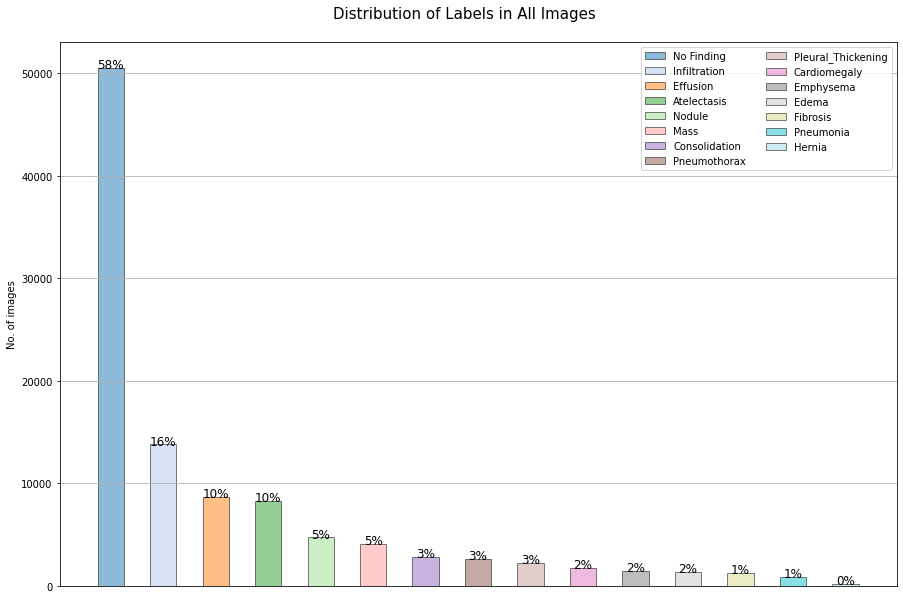

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
fig.suptitle("Distribution of Labels in All Images",y=0.93,fontsize=15)
barplot_freq(freq, 'Label',  ax) 
plt.show()

In [ ]:
freq = frequency_table(labels_single)
print("Frequency of Labels for Single-labeled Images")
display(freq)

Frequency of Labels for Single-labeled Images


Label  No. of Images  Percent of Images
0         Infiltration           7327           9.972642
1            Pneumonia            234           0.318493
2   Pleural_Thickening            817           1.112003
3                Edema            397           0.540349
4               Hernia             65           0.088470
5                 Mass           1696           2.308394
6          Atelectasis           3414           4.646731
7             Fibrosis            551           0.749956
8         Cardiomegaly            777           1.057560
9        Consolidation            829           1.128336
10        Pneumothorax           1241           1.689102
11            Effusion           2788           3.794695
12              Nodule           2248           3.059711
13          No Finding          50500          68.734603
14           Emphysema            587           0.798955

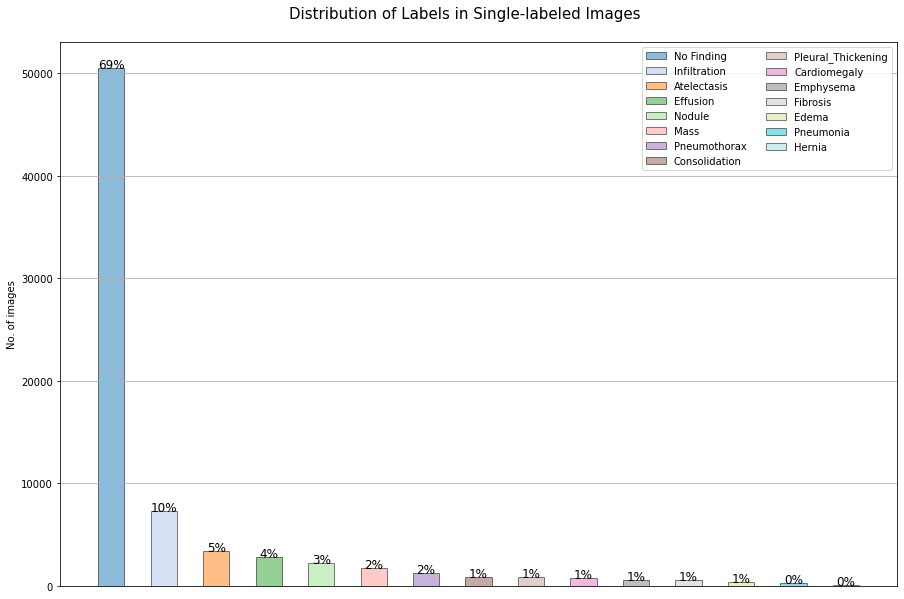

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
fig.suptitle("Distribution of Labels in Single-labeled Images",y=0.93,fontsize=15)
barplot_freq(freq, 'Label',  ax) 
plt.show()

### EDA: Distribution of Patient Variables

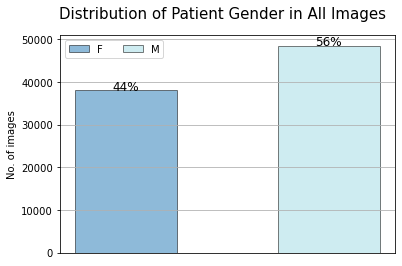

In [ ]:
# Distribution of gender
fig, ax = plt.subplots(1,1)
barplot(labels_all, 'Patient Gender', ax)
fig.suptitle("Distribution of Patient Gender in All Images", fontsize=15)
plt.show()

In [ ]:
labels_all[labels_all['label_Nodule']==1]

Image Index                Finding Labels  Follow-up #  \
12      00000004_000.png                   Mass|Nodule            0   
25      00000008_002.png                        Nodule            2   
88      00000017_000.png  Effusion|Infiltration|Nodule            0   
96      00000021_000.png                        Nodule            0   
104     00000023_004.png      Infiltration|Mass|Nodule            4   
...                  ...                           ...          ...   
111976  00030703_001.png                        Nodule            1   
111990  00030715_000.png          Consolidation|Nodule            0   
112001  00030722_000.png                        Nodule            0   
112005  00030726_000.png                        Nodule            0   
112106  00030793_000.png                   Mass|Nodule            0   

        Patient ID  Patient Age Patient Gender View Position  Width  Height  \
12               4           82              M            AP   2500    2048   
25               8           72              F            PA   2048    2500   
88              17           77              M            PA   2500    2048   
96              21           77              M            PA   2500    2048   
104             23           63              F            PA   2500    2048   
...            ...          ...            ...           ...    ...     ...   
111976       30703           57              F            PA   2021    2021   
111990       30715           48              F            PA   2021    2021   
112001       30722           45              F            PA   2021    2021   
112005       30726           63              M            PA   2021    2021   
112106       30793           57              F            PA   2021    2021   

        SpacingX  ...  label_Atelectasis  label_Fibrosis  label_Cardiomegaly  \
12      0.168000  ...              False           False               False   
25      0.168000  ...              False           False               False   
88      0.168000  ...              False           False               False   
96      0.168000  ...              False           False               False   
104     0.168000  ...              False           False               False   
...          ...  ...                ...             ...                 ...   
111976  0.194311  ...              False           False               False   
111990  0.194311  ...              False           False               False   
112001  0.194311  ...              False           False               False   
112005  0.194311  ...              False           False               False   
112106  0.194311  ...              False           False               False   

        label_Consolidation  label_Pneumothorax  label_Effusion  label_Nodule  \
12                    False               False           False          True   
25                    False               False           False          True   
88                    False               False            True          True   
96                    False               False           False          True   
104                   False               False           False          True   
...                     ...                 ...             ...           ...   
111976                False               False           False          True   
111990                 True               False           False          True   
112001                False               False           False          True   
112005                False               False           False          True   
112106                False               False           False          True   

        label_No Finding  label_Emphysema  count_label  
12                 False            False            2  
25                 False            False            1  
88                 False            False            3  
96                 False            False        

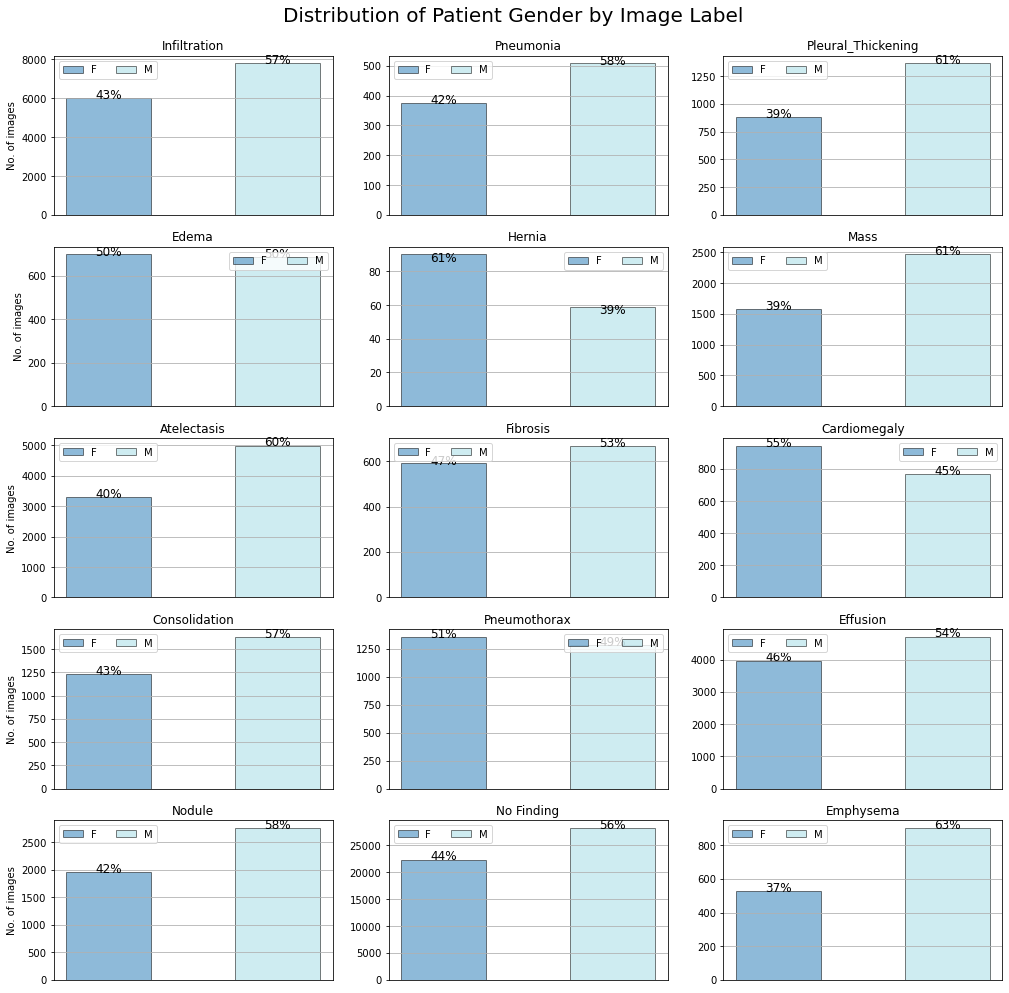

In [ ]:
# Distribution of Gender by Labels
fig, ax = plt.subplots(5,3, figsize=(17,17))
fig.suptitle("Distribution of Patient Gender by Image Label", fontsize=20, y=0.92)
ax = ax.flatten()
label_cols = [i for i in labels_all.columns if "label_" in i]
for i, label in enumerate(label_cols):
  title = label[6:]
  subset = labels_all[labels_all[label]==1]
  barplot(subset,'Patient Gender', ax[i])
  if i%3:
    ax[i].set_ylabel("")
  ax[i].set_title(title)
plt.show()

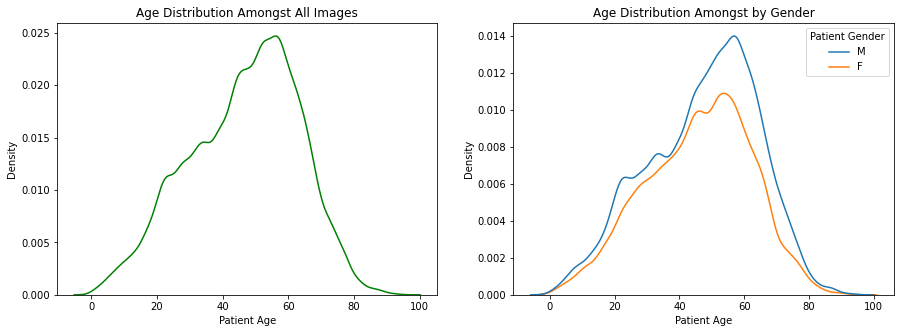

In [ ]:
# Distribution of Age
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(ax=ax[0], data=labels_all, x='Patient Age', color = 'green')
ax[0].set_title("Age Distribution Amongst All Images")
sns.kdeplot(ax=ax[1], data=labels_all, x="Patient Age", hue="Patient Gender")
ax[1].set_title("Age Distribution Amongst by Gender")
plt.show()

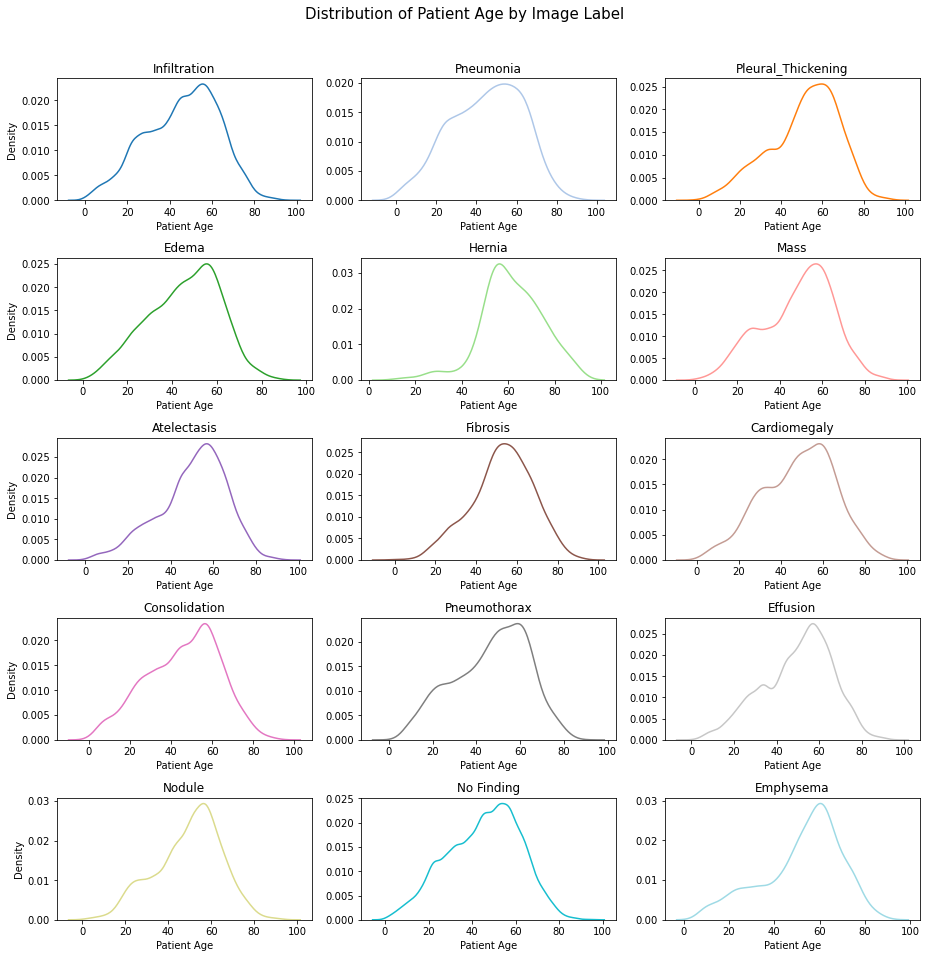

In [ ]:
# Distribution of Age by Label
fig, ax = plt.subplots(5,3, figsize=(13,13))
fig.suptitle("Distribution of Patient Age by Image Label", fontsize=15, y=1.02)
ax = ax.flatten()
label_cols = [i for i in labels_all.columns if "label_" in i]
cmap = plt.cm.get_cmap('tab20', len(label_cols))
for i, label in enumerate(label_cols):
  title = label[6:]
  subset = labels_all[labels_all[label]==1]
  sns.kdeplot(ax=ax[i], data=subset, x="Patient Age", color = cmap(i))
  if i%3:
    ax[i].set_ylabel("")
  ax[i].set_title(title)
fig.tight_layout()
plt.show()


### EDA: Explore Images

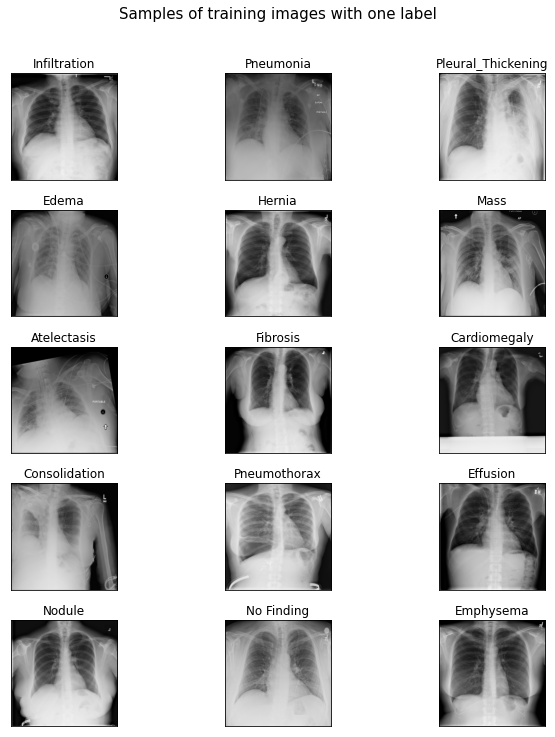

In [ ]:
# visualize images from each labels
# single label images:
import random

index = [labels_single[labels_single['Finding Labels'] == i]['Image Index'].tolist() for i in label_list]
index = [random.choice(i) for i in index]
images = [cv2.imread("images_small_train_val/"+id) for id in index]
fig, ax = plt.subplots(5,3,figsize=(10,10))
fig.suptitle("Samples of training images with one label", fontsize=15, y=1.02)
ax = ax.flatten()
for i, im in enumerate(images):
  ax[i].imshow(im)
  ax[i].set_title(list(label_list)[i])
  ax[i].set_yticks([])
  ax[i].set_xticks([])
fig.tight_layout()
plt.show()

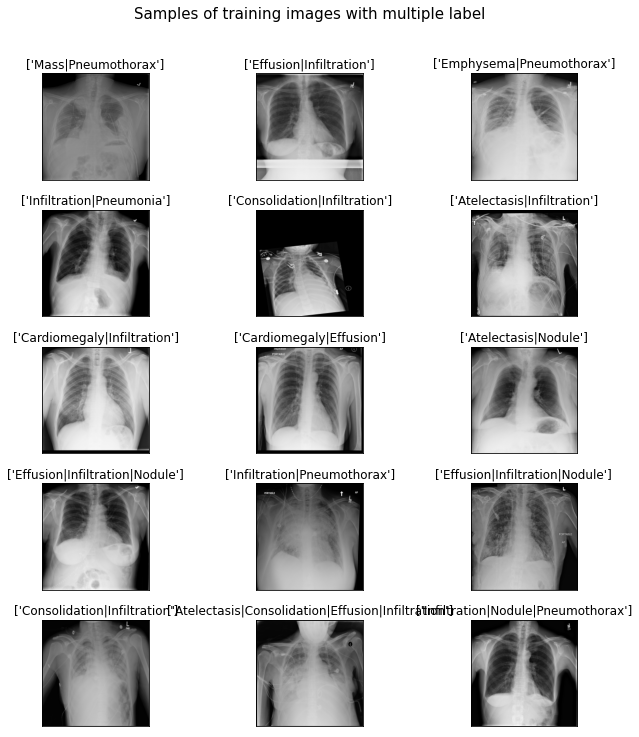

In [ ]:
# smaples of images with multiple labels
index = labels_all[labels_all['Finding Labels'].str.contains("|", regex=False)]['Image Index'].tolist()
index = random.sample(index,15)
images = [cv2.imread("images_small_train_val/"+id) for id in index]
fig, ax = plt.subplots(5,3,figsize=(10,10))
fig.suptitle("Samples of training images with multiple label", fontsize=15, y=1.02)
ax = ax.flatten()
for i, im in enumerate(images):
  title = labels_all['Finding Labels'].values[labels_all['Image Index'] == index[i]]
  ax[i].imshow(im)
  ax[i].set_title(title, wrap=True)
  ax[i].set_yticks([])
  ax[i].set_xticks([])
fig.tight_layout()
plt.show()

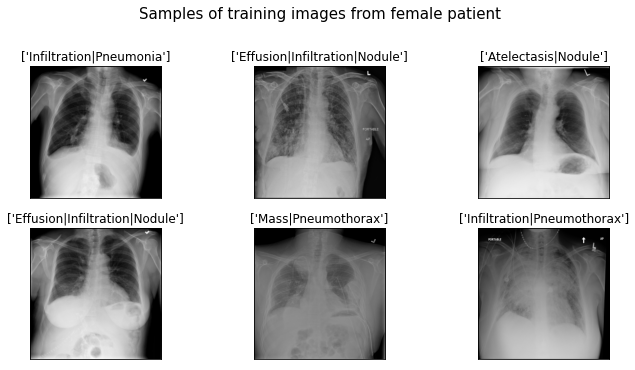

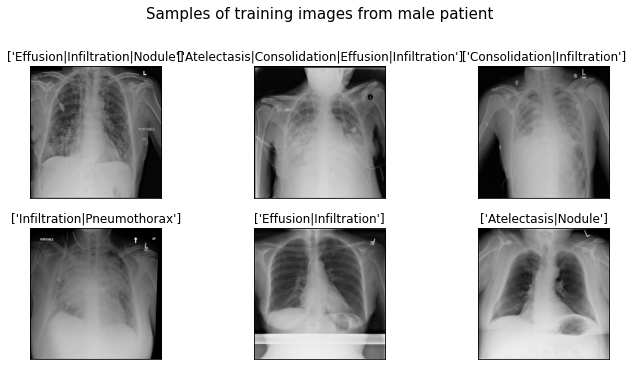

In [ ]:
# samples of images from male/female
index_f = labels_all[labels_all['Patient Gender']=='F']['Image Index'].tolist()
index_f = random.sample(index,6)
index_m = labels_all[labels_all['Patient Gender']=='M']['Image Index'].tolist()
index_m = random.sample(index,6)

images_f = [cv2.imread("images_small_train_val/"+id) for id in index_f]
images_m = [cv2.imread("images_small_train_val/"+id) for id in index_m]

fig, ax = plt.subplots(2,3,figsize=(10,5))
fig.suptitle("Samples of training images from female patient", fontsize=15, y=1.02)
ax = ax.flatten()
for i, im in enumerate(images_f):
  title=labels_all['Finding Labels'].values[labels_all['Image Index'] == index_f[i]]
  ax[i].imshow(im)
  ax[i].set_title(title)
  ax[i].set_yticks([])
  ax[i].set_xticks([])
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(2,3,figsize=(10,5))
fig.suptitle("Samples of training images from male patient", fontsize=15, y=1.02)
ax = ax.flatten()
for i, im in enumerate(images_m):
  title=labels_all['Finding Labels'].values[labels_all['Image Index'] == index_m[i]]
  ax[i].imshow(im)
  ax[i].set_title(title)
  ax[i].set_yticks([])
  ax[i].set_xticks([])
fig.tight_layout()
plt.show()

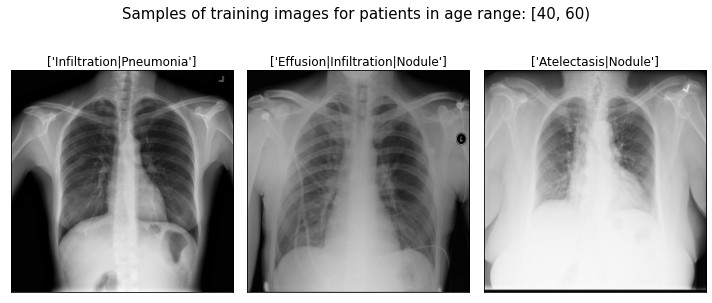

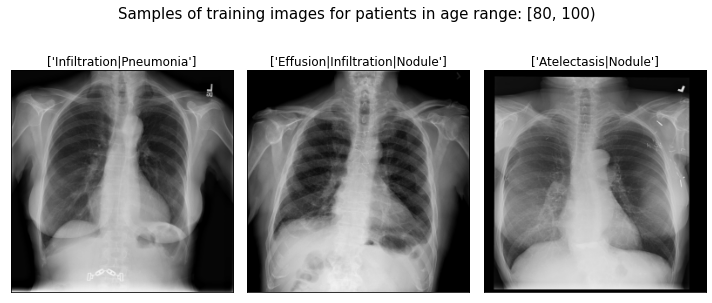

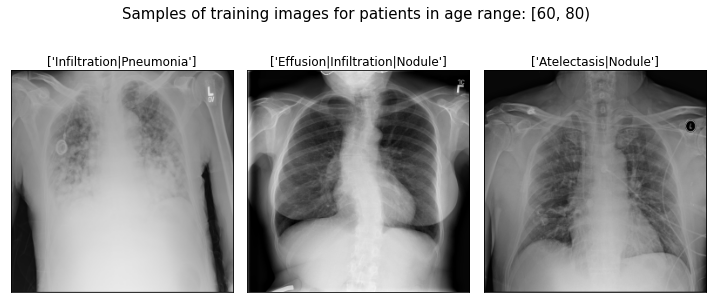

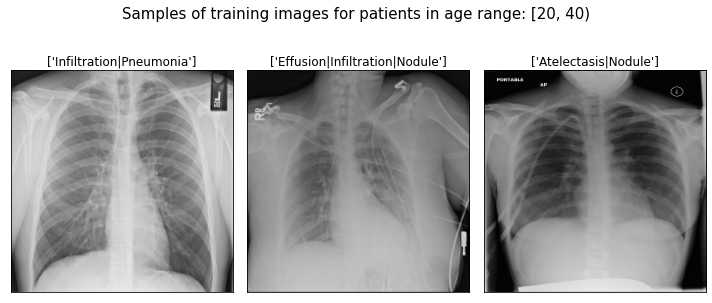

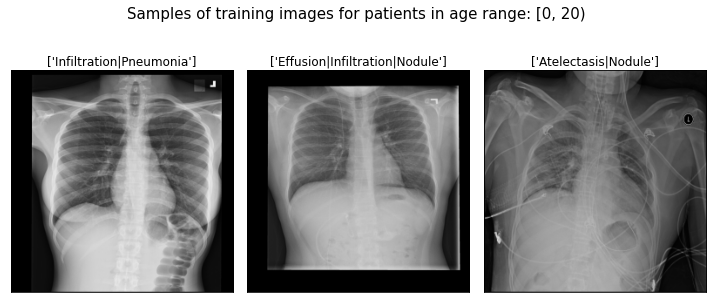

In [ ]:
# samples of images from male/female
labels_all['age_bin'] = pd.cut(labels['Patient Age'], [0,20,40,60,80,100], right=False)
index = [labels_all[labels_all['age_bin'] == i]['Image Index'].tolist() for i in labels_all['age_bin'].unique()]
index = [random.sample(i,3) for i in index]

for i, age_bin in enumerate(index):
  images = [cv2.imread("images_small_train_val/"+id) for id in age_bin]
  fig, ax = plt.subplots(1,3,figsize=(10,5))
  fig.suptitle(f"Samples of training images for patients in age range: {labels_all['age_bin'].unique()[i]}", fontsize=15, y=0.95)
  ax = ax.flatten()
  for i, im in enumerate(images):
    title=labels_all['Finding Labels'].values[labels_all['Image Index'] == index_f[i]]
    ax[i].imshow(im)
    ax[i].set_title(title)
    ax[i].set_yticks([])
    ax[i].set_xticks([])
  fig.tight_layout()
  plt.show()

## Modelling

### Data Processing

We make use of the `ImageDataGenerator.flow_from_dataframe` method to selectively load images based on metadata found in the `Data_Entry_2017_v2020.csv` file. The generator will generate pairs of (images, labels), where images are `(batch_size, 256,256,3)` and labels are multi-label, one-hot encodings of the predicted classes `(batch_size, num_classes)`. 



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
% cd /content/drive/MyDrive/data_209b_project

/content/drive/MyDrive/data_209b_project


In [ ]:
import tensorflow as tf
from tensorflow.python.client import device_lib

print("Tensorflow version  :", tf.__version__)
print("All physical devices:",tf.config.list_physical_devices())
print("Num GPUs Available  : ", len(tf.config.list_physical_devices('GPU')))
tf.test.gpu_device_name()

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np 
import pandas as pd 
from tensorflow.python.ops.gen_math_ops import TruncateMod


df = pd.read_csv('Data_Entry_2017_v2020.csv')
diseases = df['Finding Labels'].apply(lambda labels: labels.split('|')).explode().unique() 
df['finding_labels_split'] = df['Finding Labels'].apply(lambda labels: labels.split('|'))

df_encoded = pd.concat([df, df['Finding Labels'].str.get_dummies(sep='|')], axis=1)
df_encoded[diseases] = df_encoded[diseases].fillna(1).astype(int)



Tensorflow version  : 2.8.0
All physical devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs Available  :  1


In [ ]:
!nvidia-smi

Sat May  7 16:46:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    39W / 300W |    473MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Data Generator

In [ ]:
datagen = ImageDataGenerator(rescale=1./255.,
                             validation_split=0.25)
    
                            #  rotation_range = 0.1, # equivalent to RandomRotation
                            #  horizontal_flip = True, # equivalent of  RandomFlip horizontal

In [ ]:
num_data_points = 10000

# Data excluding 'no findings' for multilabel classification 
diseases_excl = ['Cardiomegaly', 'Emphysema', 'Effusion', 'Hernia',
       'Infiltration', 'Mass', 'Nodule', 'Atelectasis', 'Pneumothorax',
       'Pleural_Thickening', 'Pneumonia', 'Fibrosis', 'Edema',
       'Consolidation']

val_set_excl = datagen.flow_from_dataframe(df_encoded[df_encoded['No Finding']==0].iloc[:num_data_points], 
                            # directory='images/', 
                            directory = 'images_small_train_val', 
                            target_size=(256,256), 
                            x_col='Image Index',
                            y_col=list(diseases_excl),
                            class_mode='raw',
                            batch_size=64,
                            subset="validation"
                           )

train_set_excl = datagen.flow_from_dataframe(df_encoded[df_encoded['No Finding']==0].iloc[:num_data_points], 
                            # directory='images/', 
                            directory = 'images_small_train_val', 
                            target_size=(256,256), 
                            x_col='Image Index',
                            y_col=list(diseases_excl),
                            class_mode='raw',
                            batch_size=64,
                            subset="training"
                           )

test_set_excl = datagen.flow_from_dataframe(df_encoded[df_encoded['No Finding']==0].iloc[:num_data_points], 
                            # directory='images/', 
                            directory = 'images_small_test', 
                            target_size=(256,256), 
                            x_col='Image Index',
                            y_col=list(diseases_excl),
                            class_mode='raw',
                            batch_size=64,
                            # subset="training"
                           )

# Data excluding 'no findings' for binary classification 
val_set = datagen.flow_from_dataframe(df_encoded.iloc[:num_data_points], 
                            # directory='images/', 
                            directory = 'images_small_train_val', 
                            target_size=(256,256), 
                            x_col='Image Index',
                            y_col='No Finding',
                            class_mode='raw',
                            batch_size=64,
                            subset="validation"
                           )

train_set = datagen.flow_from_dataframe(df_encoded.iloc[:num_data_points], 
                            # directory='images/', 
                            directory = 'images_small_train_val', 
                            target_size=(256,256), 
                            x_col='Image Index',
                            y_col='No Finding',
                            class_mode='raw',
                            batch_size=64,
                            subset="training"
                           )

test_set = datagen.flow_from_dataframe(df_encoded.iloc[:num_data_points], 
                            # directory='images/', 
                            directory = 'images_small_test', 
                            target_size=(256,256), 
                            x_col='Image Index',
                            y_col='No Finding',
                            class_mode='raw',
                            batch_size=64,
                            # subset="training"
                           )


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 2483 invalid image filename(s) in x_col="Image Index". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 1879 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 2480 invalid image filename(s) in x_col="Image Index". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 5640 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 7520 invalid image filename(s) in x_col="Image Index". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 2480 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1885 invalid image filename(s) in x_col="Image Index". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 2028 validated image filenames.
Found 6087 validated image filenames.
Found 1885 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 8115 invalid image filename(s) in x_col="Image Index". These filename(s) will be ignored.
  .format(n_invalid, x_col)


### Auxiliary Functions for models

In [ ]:
models_to_use = ['ResNet50', 'AlexNet', 'VGG16', 'GoogLeNet']

H = 256
W = 256 
dropout = 0.2

def alexnet(input_shape=(227, 227, 3), include_top=False):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=input_shape, padding='valid', name="conv1"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2), name='max1', padding='valid'),
        tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same", name="conv2"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same", name="conv3"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same", name="conv4"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same", name="conv5"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    ])
    return model

In [ ]:
def model_architecture(model , H , W , dropout , fine_tune_at, classification_type):
  
  base_model = tf.keras.applications.resnet50.ResNet50(
        weights="imagenet",  # Load weights pre-trained on ImageNet.
        input_shape=(H, W, 3),  
        include_top=False,)  # Do not include the ImageNet classifier at the top.


  if model == 'ResNet50':
    base_model = tf.keras.applications.resnet50.ResNet50(
        weights="imagenet",  # Load weights pre-trained on ImageNet.
        input_shape=(H, W, 3),  
        include_top=False,)  # Do not include the ImageNet classifier at the top.

  if model == 'AlexNet':
    base_model = alexnet(
        input_shape=(H, W, 3), 
        include_top=False,)  # Do not include the ImageNet classifier at the top.

  if model == 'GoogLeNet':
    base_model = tf.keras.applications.inception_v3.InceptionV3(
      weights="imagenet",  # Load weights pre-trained on ImageNet.
      input_shape=(H, W, 3),
      include_top=False,)  # Do not include the ImageNet classifier at the top.

  if model == 'VGG16':
    base_model = tf.keras.applications.vgg16.VGG16(
      weights="imagenet",  # Load weights pre-trained on ImageNet.
      input_shape=(H, W, 3),
      include_top=False,)  # Do not include the ImageNet classifier at the top.


  for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False
  for layer in base_model.layers[fine_tune_at:]:
    layer.trainable = True

  

  data_augmentation = tf.keras.Sequential(
        [tf.keras.layers.RandomRotation(0.1),  # justification: some people might position the xray badly 
        #  tf.keras.layers.RandomBrightness(0.2), # slightly brighter, -0.2 slightly darker. # quality of the paper or damaged pap
         tf.keras.layers.RandomContrast(0.2) # different xray machine have different qualities 
         ]
    )

  # Create new model on top
  inputs = tf.keras.Input(shape=(H, W, 3))
  x = data_augmentation(inputs)  # Apply random data augmentation

  if classification_type == 'multilabel': 
    # Pre-trained Xception weights requires that input be scaled
    # from (0, 255) to a range of (-1., +1.), the rescaling layer
    # outputs: `(inputs * scale) + offset`
    scale_layer = tf.keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
    x = scale_layer(x)

    NUM_CLASSES = 14 
    # The base model contains batchnorm layers. We want to keep them in inference mode
    # when we unfreeze the base model for fine-tuning, so we make sure that the
    # base_model is running in inference mode here.
    x = base_model(x, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(dropout)(x)  # Regularize with dropout
    outputs = tf.keras.layers.Dense(NUM_CLASSES, activation = 'sigmoid')(x)
    model = tf.keras.Model(inputs, outputs)
  else:
    NUM_CLASSES = 1 
    x = base_model(x, training=False)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dropout(dropout)(x)
    x = tf.keras.layers.Dense(50, activation='relu')(x)
    x = tf.keras.layers.Dense(20, activation='relu')(x)
    outputs = tf.keras.layers.Dense(NUM_CLASSES, activation='sigmoid')(x)
    model = tf.keras.Model(inputs, outputs)
  return model

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report

In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = roc_curve(labels, predictions)
  auc_val = auc(fp, tp)
  plt.plot(100*fp, 100*tp, label=f'{name}: {round(auc_val,2)}', linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  ax = plt.gca()
  ax.set_aspect('equal')


def plotting_(history, classification_type):

  #  "Accuracy"
  plt.plot(history.history['binary_accuracy'])
  plt.plot(history.history['val_binary_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  # "Loss"
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  # y_pred_train = model.predict_generator(train_set, steps = len(train_set))
  # y_pred_train = y_pred_train.round()
  # y_train = train_set.labels
  # print('Train scores')
  # print(f'{classification_report(y_train, y_pred_train)}')

  plt.figure(figsize=(6,6))
  if classification_type == 'multilabel': 
    y_pred_test_proba = model.predict_generator(test_set_excl, steps = len(test_set_excl))
    y_pred_test = y_pred_test_proba.round()
    y_test = test_set_excl.labels
    print(f'Test scores:')
    print(f'{classification_report(y_test, y_pred_test)}')
    
    for i in range(y_test.shape[1]):
      plot_roc(diseases_excl[i], y_test[:,i], y_pred_test_proba[:,i])
    plt.title('ROC by diseases')
    plt.legend(loc='lower right');
  else: 
    y_pred_test_proba = model.predict_generator(test_set, steps = len(test_set))
    y_pred_test = y_pred_test_proba.round()
    y_test = test_set.labels
    print(f'Test scores:')
    print(f'{classification_report(y_test, y_pred_test)}')

    plot_roc('No findings', y_test, y_pred_test_proba)
    plt.title('ROC by findings')
    plt.legend(loc='lower right');

# 3 Modelling Approach 

Our dataset has highly imbalanced classes, with majority of the data being labelled as 'no finding'. To get better accuracy in our models, we have split the modelling into two tasks. 

1. Task 1:  Binary classification of two classes: "No findings" and "With findings" 
2. Task 2:  Multilabel classification of 14 diseases classes, only on data with findings 

Task 1 deals with two better balanced classes. We will be running a binary classifcation with binary cross entropy as the loss function. It provides predicition of whether a X-ray is indicative of the presence of a disease. 

Task 2 deals with 14 diseases classes ran only on data for patients with dieases.  It will be based on a one hot encoded vectors of length 14 to enable a multi-label classification architecture. A patient could have multiple diseases, which will be appropriately reflected in the one-hot encoded. It provides a prediction of the diseases present in a X-ray, given that a patient has a disease.To a lesser extent, imbalanced classes issue is also present in the tasks. We have hence defined a weighted loss function to address the imbalanced classes.We define following loss function: $$L_w = w_P \sum_{y=1} -\log f(x) + w_N \sum_{y=0} -\log(1 - f(x))$$


where $w_P = \frac{|P| + |N|}{P}$ is the inverse fraction of positive samples in the batch, and $w_N = \frac{|P|+|N|}{N}$ is the inverse fraction of negative samples in the batch.

## 3.1 Architecture

We base our modelling on existing architectures AlexNet, GoogLeNet [1], VGGNet-16 [2] and ResNet-50 [3], trained on the ImageNet [4] dataset. To fit the model to our current task, we will remove the final fully-connected layers, and only retain the convolutional layers. We will replace them instead with a global pooling layer, a dropout layer and a fully-connected prediction layer. 

When training on the ChestX-ray14 dataset, we will train using two approaches. We will first train on all layers of the architecture. This however assumes that we have enough data for the model to learn from. Our other approach is to train only from selected layers onwards, where we freeze some layers so as not to destroy any previously trianed weights. This assumes that the original weights from the early layers of training ImageNet would be helpful for our task. 


[1] Imagenet classification with deep
convolutional neural networks. ALex Krizhevsky. https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf 

[2] Going deeper with convolutions. Christian Szegedy. https://arxiv.org/abs/1409.4842 

[3] Very deep convolutional networks for large-scale image recognition. Karen Simonyan. https://arxiv.org/abs/1409.1556 

[4] Deep residual learning for image recognition. Kaiming He. https://arxiv.org/abs/1512.03385 

[5] Imagenet: A large-scale hierarchical image database. Jia Deng. https://image-net.org/static_files/papers/imagenet_cvpr09.pdf 

## 3.2 Metrics

As highlighted in our data visualization, our data has a class imbalanced problem. If we were to use
accuracy as a performance metric, it would erroneously report that our model is performing relatively
well. 

A better metric to consider would be the F1 score. F1 score combines both the precision and recall of
a classifier. Precision would be more appropriate should we be concerned with false positives, while
recall would be more appropriate with false negatives. At this stage, we are concerned with both false
positives and negatives and F1 score is deemed more balanced and thus more appropriate. For overall
model evaluation, we would rely on macro F1 which is an unweighted average of the F1 scores.

\begin{equation}
    Precision = \frac{True\,positives}{True\,positives + False\,positives}
\end{equation}

\begin{equation}
    Recall = \frac{True\,positives}{True\,positives + False\,negatives}
\end{equation}

\begin{equation}
    F1 = 2 \times \frac{Precision \times Recall}{Precision\, + \,Recall}
\end{equation}



## 3.3 Parameters decisions

Due to computational constraints, we have run our models on 10,000 data points. For the same reason, we have trained our models only on 10 epochs. Early stopping was introduced to stop training when there is no improvement in the model. We adopted a patience of 5 representing the number of epochs with no improvement after which training will be stopped. Best weights will then be restored from the best epoch from the set. 

## 3.4 Modelling 

### Custom Loss

In [ ]:
num_data_points == df_encoded[df_encoded['No Finding']==0].iloc[:num_data_points].shape[0]

True

In [ ]:
def print_data_info(name, df):
  print("##############################################")
  print(name)
  display(df.head())
  print("")
  print("No. of obs: ", len(df))
  print("No. of columns: ", len(df.columns), "\n")
  print(df.dtypes)

# train-validation list
train_val_list = pd.read_csv('train_val_list.txt', header=None, names=['index'])

# load label data - training and validation only
labels = pd.read_csv('Data_Entry_2017_v2020.csv')
labels = labels[labels['Image Index'].isin(train_val_list['index'])]
labels = labels.rename(columns={'OriginalImage[Width':'Width','Height]':'Height','OriginalImagePixelSpacing[x':'SpacingX','y]':'SpacingY'})
print_data_info("LABELS", labels)

#Calculate weights
positive_weights = {}
negative_weights = {}

df_with_finding = df_encoded[df_encoded['No Finding']==0]
num_images = num_data_points

for c in list(diseases_excl):
    positive_weights[c] = num_images/(np.count_nonzero(df_with_finding.iloc[:num_data_points][c]==1))
    negative_weights[c] = num_images/(np.count_nonzero(df_with_finding.iloc[:num_data_points][c]==0))
print(positive_weights)
print(negative_weights)


# weighted_loss_fn = getting_weighted_loss(1, 2)
def loss_fn(y_true,y_pred):
    y_true = tf.cast(y_true, tf.float32)

    loss = 0
    for i, (k, v) in enumerate(positive_weights.items()):
      loss -= K.mean(positive_weights[k]*y_true[:,i]*K.log(y_pred[:,i]) + negative_weights[k]*(1-y_true[:,i])*K.log(1-y_pred[:,i]))
    return loss

##############################################
LABELS


Image Index          Finding Labels  Follow-up #  Patient ID  \
0   00000001_000.png            Cardiomegaly            0           1   
1   00000001_001.png  Cardiomegaly|Emphysema            1           1   
2   00000001_002.png   Cardiomegaly|Effusion            2           1   
3   00000002_000.png              No Finding            0           2   
12  00000004_000.png             Mass|Nodule            0           4   

    Patient Age Patient Gender View Position  Width  Height  SpacingX  \
0            57              M            PA   2682    2749     0.143   
1            58              M            PA   2894    2729     0.143   
2            58              M            PA   2500    2048     0.168   
3            80              M            PA   2500    2048     0.171   
12           82              M            AP   2500    2048     0.168   

    SpacingY  
0      0.143  
1      0.143  
2      0.168  
3      0.171  
12     0.168


No. of obs:  86524
No. of columns:  11 

Image Index        object
Finding Labels     object
Follow-up #         int64
Patient ID          int64
Patient Age         int64
Patient Gender     object
View Position      object
Width               int64
Height              int64
SpacingX          float64
SpacingY          float64
dtype: object
{'Cardiomegaly': 12.88659793814433, 'Emphysema': 21.598272138228943, 'Effusion': 4.4543429844097995, 'Hernia': 178.57142857142858, 'Infiltration': 2.787068004459309, 'Mass': 12.422360248447205, 'Nodule': 8.64304235090752, 'Atelectasis': 4.528985507246377, 'Pneumothorax': 10.834236186348862, 'Pleural_Thickening': 13.831258644536653, 'Pneumonia': 35.842293906810035, 'Fibrosis': 18.975332068311197, 'Edema': 30.211480362537763, 'Consolidation': 11.337868480725623}
{'Cardiomegaly': 1.0841283607979184, 'Emphysema': 1.0485477613505294, 'Effusion': 1.2894906511927788, 'Hernia': 1.005631536604988, 'Infiltration': 1.5595757953836555, 'Mass': 1.0875475802066341

### Visualizing layers so that to decide from where to fineture

In [ ]:
base_model = tf.keras.applications.vgg16.VGG16(
  weights="imagenet",  # Load weights pre-trained on ImageNet.
  input_shape=(H, W, 3),
  include_top=False,)  # Do not include the ImageNet classifier at the top.


base_model = tf.keras.applications.resnet50.ResNet50(
  weights="imagenet",  # Load weights pre-trained on ImageNet.
  input_shape=(H, W, 3),  
  include_top=False,)  # Do not include the ImageNet classifier at the top.

base_model = tf.keras.applications.inception_v3.InceptionV3(      
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(H, W, 3),
    include_top=False,)  # Do not include the ImageNet classifier at 

base_model = alexnet(      
    # weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(H, W, 3),
    include_top=False,)  # Do not include the ImageNet classifier at 



for i, layer in enumerate(base_model.layers):
   print(i, layer.name, layer.trainable)

87924736/87910968 [==============================] - 1s 0us/step
0 conv1 True
1 batch_normalization_94 True
2 max1 True
3 conv2 True
4 batch_normalization_95 True
5 max_pooling2d_4 True
6 conv3 True
7 batch_normalization_96 True
8 conv4 True
9 batch_normalization_97 True
10 conv5 True
11 batch_normalization_98 True
12 max_pooling2d_5 True


### Baseline results: Binary Naive Classifier

In [ ]:
X = np.ones(shape = df_encoded.iloc[:num_data_points].shape[0])
y = df_encoded.iloc[:num_data_points]['No Finding']
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X, y)
y_pred = dummy_clf.predict(X)
print(classification_report(y, y_pred));

              precision    recall  f1-score   support

           0       0.44      0.44      0.44      4291
           1       0.58      0.58      0.58      5709

    accuracy                           0.52     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.52      0.52      0.52     10000



### Baseline results: Multi-label Naive Classifier

In [ ]:
X = np.ones(shape = df_encoded[df_encoded['No Finding']==0].iloc[:num_data_points].shape[0])
y = df_encoded[df_encoded['No Finding']==0].iloc[:num_data_points][diseases_excl]
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X, y)
y_pred = dummy_clf.predict(X)
print(classification_report(y, y_pred));

              precision    recall  f1-score   support

           0       0.09      0.08      0.08       776
           1       0.05      0.05      0.05       463
           2       0.22      0.21      0.22      2245
           3       0.03      0.04      0.03        56
           4       0.36      0.36      0.36      3588
           5       0.08      0.08      0.08       805
           6       0.11      0.11      0.11      1157
           7       0.22      0.23      0.23      2208
           8       0.07      0.07      0.07       923
           9       0.07      0.07      0.07       723
          10       0.02      0.03      0.02       279
          11       0.08      0.08      0.08       527
          12       0.03      0.04      0.03       331
          13       0.10      0.10      0.10       882

   micro avg       0.19      0.19      0.19     14963
   macro avg       0.11      0.11      0.11     14963
weighted avg       0.19      0.19      0.19     14963
 samples avg       0.16   

/opt/conda/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
### Parameters
batch_size = 64
epochs = 10

## Running Resnet

### Multilabel classification

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                           

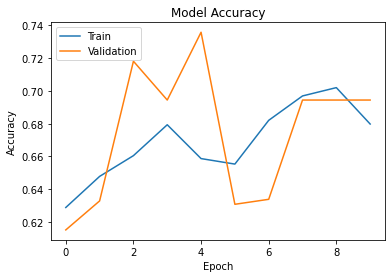

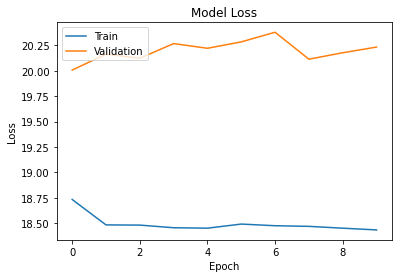

/tmp/ipykernel_43/2273223313.py:39: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_test_proba = model.predict_generator(test_set_excl, steps = len(test_set_excl))


Test scores:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       363
           1       0.00      0.00      0.00       117
           2       0.23      1.00      0.38       578
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00      1027
           5       0.06      1.00      0.11       144
           6       0.08      1.00      0.15       200
           7       0.19      1.00      0.31       461
           8       0.00      0.00      0.00       298
           9       0.00      0.00      0.00       196
          10       0.00      0.00      0.00        93
          11       0.00      0.00      0.00       125
          12       0.00      0.00      0.00       117
          13       0.00      0.00      0.00       255

   micro avg       0.14      0.35      0.20      3998
   macro avg       0.04      0.29      0.07      3998
weighted avg       0.06      0.35      0.10      3998
 samples avg 

/opt/conda/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


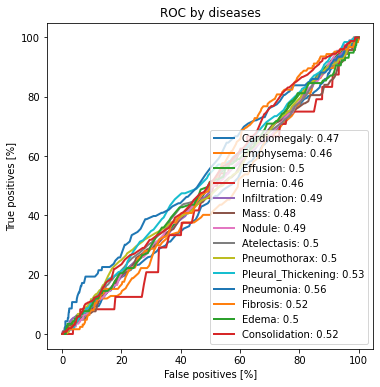

In [ ]:
###########################
## ALL FINE TUNED - Multilabel 
###########################

models_to_use = ['ReNet50', 'AlexNet', 'VGG16', 'GoogLeNet']

model = model_architecture(model = models_to_use[0], H = H, W = W, 
                           dropout = dropout, fine_tune_at = 0, 
                           classification_type = 'multilabel')

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.00001), 
              loss = loss_fn,
              metrics = [tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.AUC()])

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

history = model.fit(train_set_excl, validation_data=val_set_excl, epochs = epochs, verbose = 1, batch_size=batch_size, callbacks=[es])

plotting_(history, classification_type = 'multilabel')

# save weights
model.save_weights('trained_models/checkpoints/Resnet_all_finetuned_wts_multi')
# save models
model.save('trained_models/Resnet_all_finetuned_multi.h5')

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential_4 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 2048)              0         
                                                           

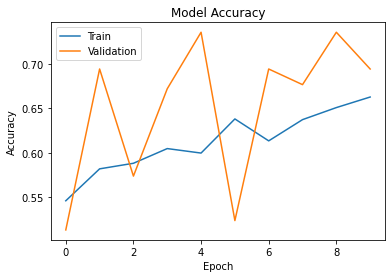

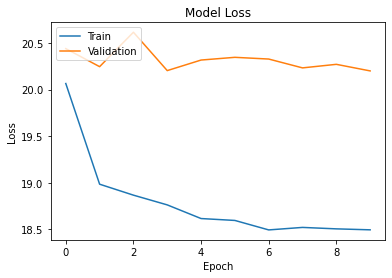

/tmp/ipykernel_43/2273223313.py:39: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_test_proba = model.predict_generator(test_set_excl, steps = len(test_set_excl))


Test scores:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       363
           1       0.00      0.00      0.00       117
           2       0.23      1.00      0.38       578
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00      1027
           5       0.06      1.00      0.11       144
           6       0.08      1.00      0.15       200
           7       0.19      1.00      0.31       461
           8       0.00      0.00      0.00       298
           9       0.00      0.00      0.00       196
          10       0.00      0.00      0.00        93
          11       0.00      0.00      0.00       125
          12       0.00      0.00      0.00       117
          13       0.00      0.00      0.00       255

   micro avg       0.14      0.35      0.20      3998
   macro avg       0.04      0.29      0.07      3998
weighted avg       0.06      0.35      0.10      3998
 samples avg 

/opt/conda/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


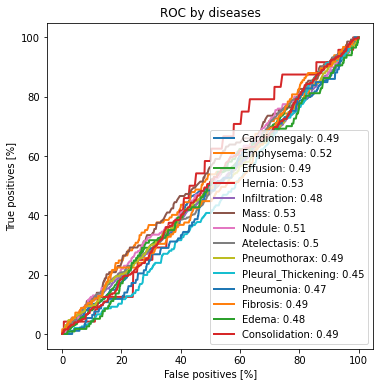

In [ ]:
###########################
## Partially fine tuned - Multilabel 
###########################

models_to_use = ['ReNet50', 'AlexNet', 'VGG16', 'GoogLeNet']

model = model_architecture(model = models_to_use[0], H = H, W = W, 
                           dropout = dropout, fine_tune_at = 165, 
                           classification_type = 'multilabel')

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.00001), 
              loss = loss_fn,
              metrics = [tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.AUC()])

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

history = model.fit(train_set_excl, validation_data=val_set_excl, epochs = epochs, verbose = 1, batch_size=batch_size, callbacks=[es])

plotting_(history, classification_type = 'multilabel')

# save weights
model.save_weights('trained_models/checkpoints/Resnet_partially_finetuned_wts_multi')
# save models
model.save('trained_models/Resnet_partially_finetuned_multi.h5')

### Binary classification

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 sequential_5 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dropout_4 (Dropout)         (None, 131072)            0         
                                                                 
 dense_4 (Dense)             (None, 50)                6553650   
                                                                 
 dense_5 (Dense)             (None, 20)                1020

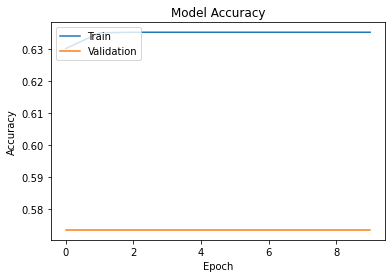

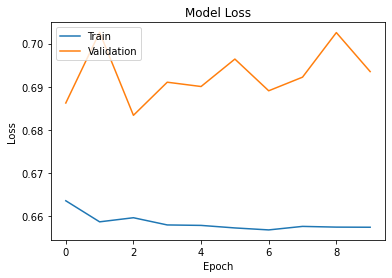

/tmp/ipykernel_43/2273223313.py:50: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_test_proba = model.predict_generator(test_set, steps = len(test_set))


Test scores:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1205
           1       0.36      1.00      0.53       680

    accuracy                           0.36      1885
   macro avg       0.18      0.50      0.27      1885
weighted avg       0.13      0.36      0.19      1885



/opt/conda/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


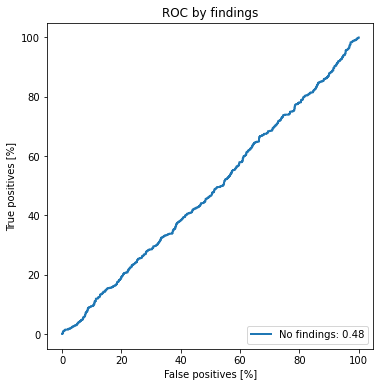

In [ ]:
# ###########################
# ## ALL FINE TUNED - Binary 
# ###########################

models_to_use = ['ReNet50', 'AlexNet', 'VGG16', 'GoogLeNet']

model = model_architecture(model = models_to_use[0], H = H, W = W, 
                           dropout = dropout, fine_tune_at = 0, 
                           classification_type = 'binary')

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.00001), 
              loss='binary_crossentropy', 
              metrics = [tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.AUC()])

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

history = model.fit(train_set, validation_data=val_set, epochs = epochs, verbose = 1, batch_size=batch_size, callbacks=[es])

plotting_(history, classification_type = 'binary')

# save weights
model.save_weights('trained_models/checkpoints/Resnet_all_finetuned_wts_binary')
# save models
model.save('trained_models/Resnet_all_finetuned_binary.h5')

## Running Alexnet

### Multilabel classification

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 sequential_7 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 sequential_6 (Sequential)   (None, 6, 6, 256)         3752704   
                                                                 
 global_average_pooling2d_4   (None, 256)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                           

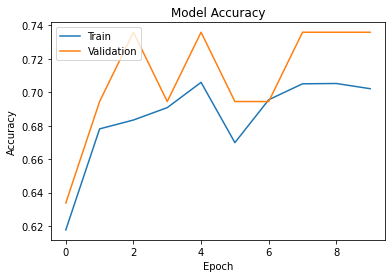

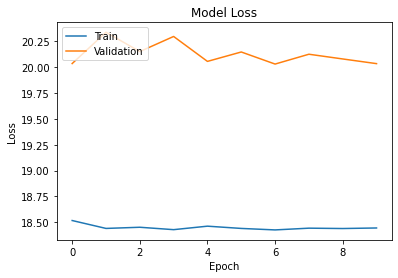

/tmp/ipykernel_43/2273223313.py:39: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_test_proba = model.predict_generator(test_set_excl, steps = len(test_set_excl))


Test scores:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       363
           1       0.00      0.00      0.00       117
           2       0.00      0.00      0.00       578
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00      1027
           5       0.06      1.00      0.11       144
           6       0.08      1.00      0.15       200
           7       0.19      1.00      0.31       461
           8       0.00      0.00      0.00       298
           9       0.00      0.00      0.00       196
          10       0.00      0.00      0.00        93
          11       0.00      0.00      0.00       125
          12       0.00      0.00      0.00       117
          13       0.00      0.00      0.00       255

   micro avg       0.11      0.20      0.14      3998
   macro avg       0.02      0.21      0.04      3998
weighted avg       0.03      0.20      0.05      3998
 samples avg 

/opt/conda/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


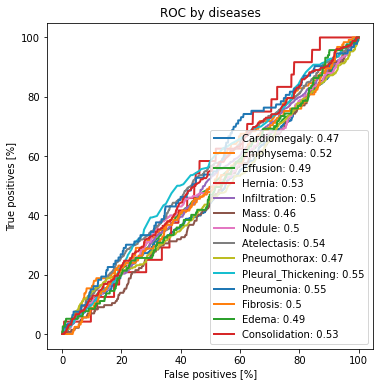

In [ ]:
###########################
## ALL FINE TUNED - Multilabel 
###########################

models_to_use = ['ReNet50', 'AlexNet', 'VGG16', 'GoogLeNet']

model = model_architecture(model = models_to_use[1], H = H, W = W, 
                           dropout = dropout, fine_tune_at = 0, 
                           classification_type = 'multilabel')

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.00001), 
              loss = loss_fn,
              metrics = [tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.AUC()])

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

history = model.fit(train_set_excl, validation_data=val_set_excl, epochs = epochs, verbose = 1, batch_size=batch_size, callbacks=[es])

plotting_(history, classification_type = 'multilabel')

# save weights
model.save_weights('trained_models/checkpoints/Alexnet_all_finetuned_wts_multi')
# save models
model.save('trained_models/Alexnet_all_finetuned_multi.h5')

### Binary classification

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 sequential_9 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 sequential_8 (Sequential)   (None, 6, 6, 256)         3752704   
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dropout_6 (Dropout)         (None, 9216)              0         
                                                                 
 dense_8 (Dense)             (None, 50)                460850    
                                                                 
 dense_9 (Dense)             (None, 20)                1020

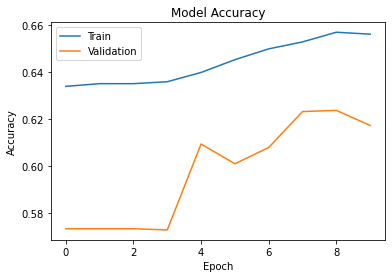

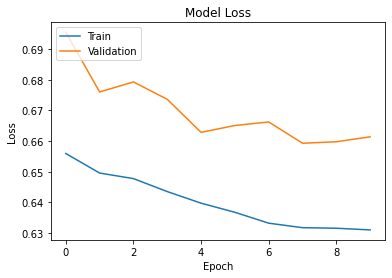

/tmp/ipykernel_43/2273223313.py:50: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_test_proba = model.predict_generator(test_set, steps = len(test_set))


Test scores:
              precision    recall  f1-score   support

           0       0.65      0.51      0.57      1205
           1       0.37      0.52      0.44       680

    accuracy                           0.51      1885
   macro avg       0.51      0.51      0.50      1885
weighted avg       0.55      0.51      0.52      1885



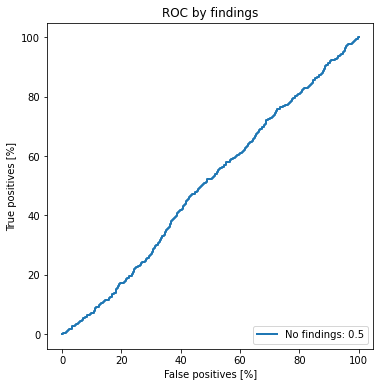

In [ ]:
# ###########################
# ## ALL FINE TUNED - Binary 
# ###########################

models_to_use = ['ReNet50', 'AlexNet', 'VGG16', 'GoogLeNet']

model = model_architecture(model = models_to_use[1], H = H, W = W, 
                           dropout = dropout, fine_tune_at = 0, 
                           classification_type = 'binary')

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.00001), 
              loss='binary_crossentropy', 
              metrics = [tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.AUC()])

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

history = model.fit(train_set, validation_data=val_set, epochs = epochs, verbose = 1, batch_size=batch_size, callbacks=[es])

plotting_(history, classification_type = 'binary')

# save weights
model.save_weights('trained_models/checkpoints/Alexnet_all_finetuned_wts_binary')
# save models
model.save('trained_models/Alexnet_all_finetuned_binary.h5')

## Running VGG

### Multilabel classification

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 sequential_8 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 global_average_pooling2d_4   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                           

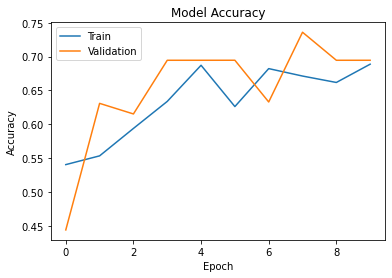

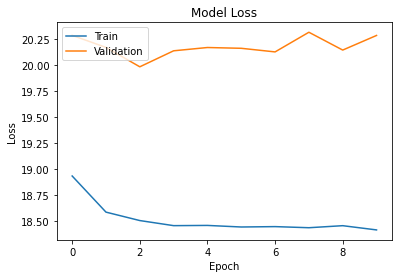

/tmp/ipykernel_72/2399023031.py:39: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_test_proba = model.predict_generator(test_loader, steps = len(test_set_excl))


Test scores:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       363
           1       0.00      0.00      0.00       117
           2       0.23      1.00      0.38       578
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00      1027
           5       0.06      1.00      0.11       144
           6       0.08      1.00      0.15       200
           7       0.19      1.00      0.31       461
           8       0.00      0.00      0.00       298
           9       0.00      0.00      0.00       196
          10       0.00      0.00      0.00        93
          11       0.00      0.00      0.00       125
          12       0.00      0.00      0.00       117
          13       0.00      0.00      0.00       255

   micro avg       0.14      0.35      0.20      3998
   macro avg       0.04      0.29      0.07      3998
weighted avg       0.06      0.35      0.10      3998
 samples avg 

/opt/conda/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


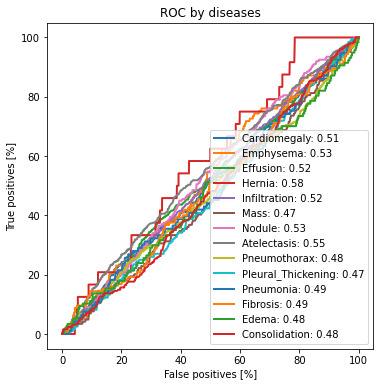

In [ ]:
###########################
## ALL FINE TUNED - Multilabel 
###########################

models_to_use = ['ReNet50', 'AlexNet', 'VGG16', 'GoogLeNet']

model = model_architecture(model = models_to_use[2], H = H, W = W, 
                           dropout = dropout, fine_tune_at = 0, 
                           classification_type = 'multilabel')

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.00001), 
              loss = loss_fn,
              metrics = [tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.AUC()])

# es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

history = model.fit(train_set_excl, validation_data=val_set_excl, epochs = epochs, verbose = 1, batch_size=batch_size)

plotting_(history, model, test_set_excl, classification_type = 'multilabel')

# save weights
model.save_weights('trained_models/checkpoints/VGG_all_finetuned_wts_multi')
# save models
model.save('trained_models/VGG_all_finetuned_multi.h5')

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 sequential_9 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 global_average_pooling2d_5   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                           

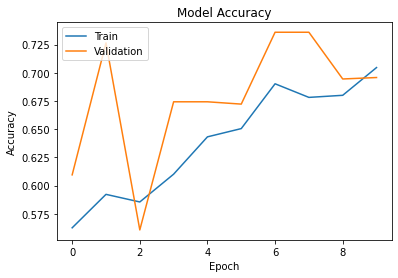

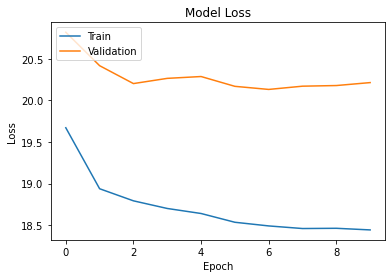

/tmp/ipykernel_72/2399023031.py:39: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_test_proba = model.predict_generator(test_loader, steps = len(test_set_excl))


Test scores:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       363
           1       0.00      0.00      0.00       117
           2       0.23      0.98      0.38       578
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00      1027
           5       0.06      1.00      0.11       144
           6       0.08      1.00      0.15       200
           7       0.19      1.00      0.31       461
           8       0.00      0.00      0.00       298
           9       0.00      0.00      0.00       196
          10       0.00      0.00      0.00        93
          11       0.00      0.00      0.00       125
          12       0.00      0.00      0.00       117
          13       0.00      0.00      0.00       255

   micro avg       0.14      0.34      0.20      3998
   macro avg       0.04      0.28      0.07      3998
weighted avg       0.06      0.34      0.10      3998
 samples avg 

/opt/conda/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


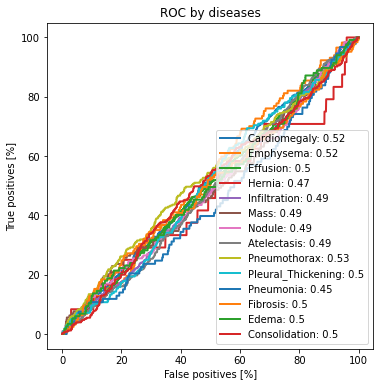

In [ ]:
###########################
## Partially finetuned - Multilabel 
###########################

models_to_use = ['ReNet50', 'AlexNet', 'VGG16', 'GoogLeNet']

model = model_architecture(model = models_to_use[2], H = H, W = W, 
                           dropout = dropout, fine_tune_at = 13, 
                           classification_type = 'multilabel')

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.00001), 
              loss = loss_fn,
              metrics = [tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.AUC()])

# es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

history = model.fit(train_set_excl, validation_data=val_set_excl, epochs = epochs, verbose = 1, batch_size=batch_size)

plotting_(history, model, test_set_excl, classification_type = 'multilabel')

# save weights
model.save_weights('trained_models/checkpoints/VGG_partially_finetuned_wts_multi')
# save models
model.save('trained_models/VGG_partially_finetuned_multi.h5')

### Binary classification

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dropout_1 (Dropout)         (None, 32768)             0         
                                                                 
 dense_1 (Dense)             (None, 50)                1638450   
                                                                 
 dense_2 (Dense)             (None, 20)                1020

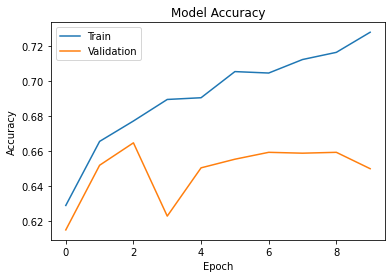

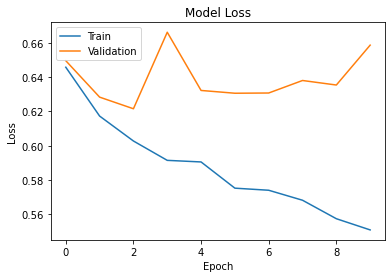

/tmp/ipykernel_44/2273223313.py:50: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_test_proba = model.predict_generator(test_set, steps = len(test_set))


Test scores:
              precision    recall  f1-score   support

           0       0.64      0.58      0.61      1205
           1       0.36      0.42      0.39       680

    accuracy                           0.52      1885
   macro avg       0.50      0.50      0.50      1885
weighted avg       0.54      0.52      0.53      1885



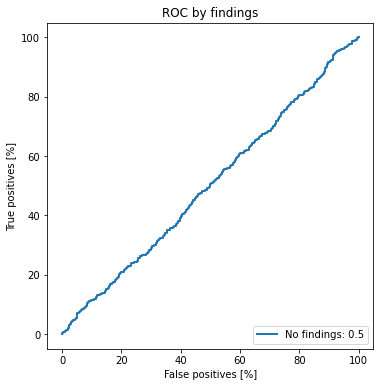

In [ ]:
# ###########################
# ## ALL FINE TUNED - Binary 
# ###########################

models_to_use = ['ReNet50', 'AlexNet', 'VGG16', 'GoogLeNet']

model = model_architecture(model = models_to_use[2], H = H, W = W, 
                           dropout = dropout, fine_tune_at = 0, 
                           classification_type = 'binary')

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.00001), 
              loss='binary_crossentropy', 
              metrics = [tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.AUC()])

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

history = model.fit(train_set, validation_data=val_set, epochs = epochs, verbose = 1, batch_size=batch_size, callbacks=[es])

plotting_(history, classification_type = 'binary')

# save weights
model.save_weights('trained_models/checkpoints/VGG_partially_finetuned_wts_binary')
# save models
model.save('trained_models/VGG_partially_finetuned_binary.h5')

## Running GoogleNet

### Multilabel classification

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 sequential_11 (Sequential)  (None, 256, 256, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 global_average_pooling2d_6   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_9 (Dropout)         (None, 2048)              0         
                                                           

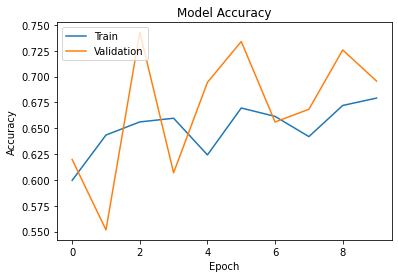

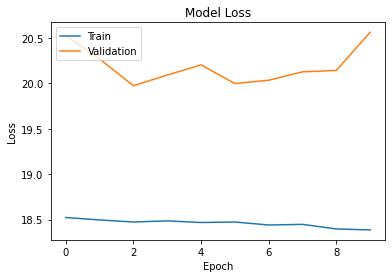

/tmp/ipykernel_72/2399023031.py:39: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_test_proba = model.predict_generator(test_loader, steps = len(test_set_excl))


Test scores:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       363
           1       0.00      0.00      0.00       117
           2       0.23      0.96      0.37       578
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00      1027
           5       0.06      1.00      0.11       144
           6       0.08      1.00      0.15       200
           7       0.19      1.00      0.31       461
           8       0.00      0.00      0.00       298
           9       0.15      0.02      0.04       196
          10       0.00      0.00      0.00        93
          11       0.00      0.00      0.00       125
          12       0.00      0.00      0.00       117
          13       0.11      0.03      0.04       255

   micro avg       0.14      0.34      0.20      3998
   macro avg       0.06      0.29      0.07      3998
weighted avg       0.08      0.34      0.11      3998
 samples avg 

/opt/conda/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


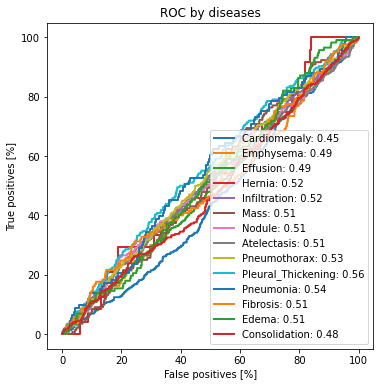

In [ ]:
###########################
## ALL FINE TUNED - Multilabel 
###########################

models_to_use = ['ReNet50', 'AlexNet', 'VGG16', 'GoogLeNet']

model = model_architecture(model = models_to_use[3], H = H, W = W, 
                           dropout = dropout, fine_tune_at = 0, 
                           classification_type = 'multilabel')

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.00001), 
              loss = loss_fn,
              metrics = [tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.AUC()])

# es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

history = model.fit(train_set_excl, validation_data=val_set_excl, epochs = epochs, verbose = 1, batch_size=batch_size)

plotting_(history, model, test_set_excl, classification_type = 'multilabel')

# save weights
model.save_weights('trained_models/checkpoints/gogolenet_all_finetuned_wts_multi')
# save models
model.save('trained_models/GoogleNet_all_finetuned_multi.h5')

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 sequential_12 (Sequential)  (None, 256, 256, 3)       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 global_average_pooling2d_7   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_10 (Dropout)        (None, 2048)              0         
                                                          

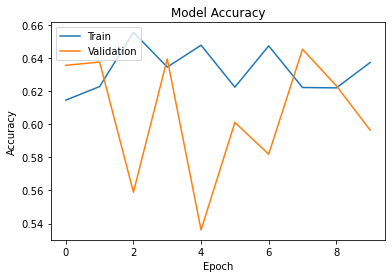

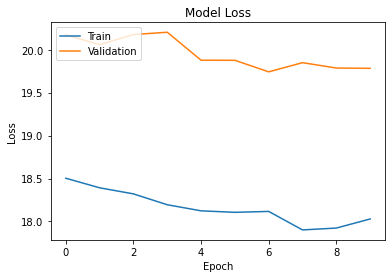

/tmp/ipykernel_72/2399023031.py:39: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_test_proba = model.predict_generator(test_loader, steps = len(test_set_excl))


Test scores:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       363
           1       0.06      0.25      0.09       117
           2       0.22      0.46      0.30       578
           3       0.00      0.00      0.00        24
           4       0.40      0.05      0.08      1027
           5       0.06      0.99      0.11       144
           6       0.08      0.71      0.15       200
           7       0.17      0.50      0.26       461
           8       0.11      0.45      0.18       298
           9       0.08      0.52      0.14       196
          10       0.03      0.19      0.06        93
          11       0.04      0.30      0.07       125
          12       0.04      0.40      0.08       117
          13       0.11      0.31      0.16       255

   micro avg       0.10      0.32      0.15      3998
   macro avg       0.10      0.37      0.12      3998
weighted avg       0.18      0.32      0.14      3998
 samples avg 

/opt/conda/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


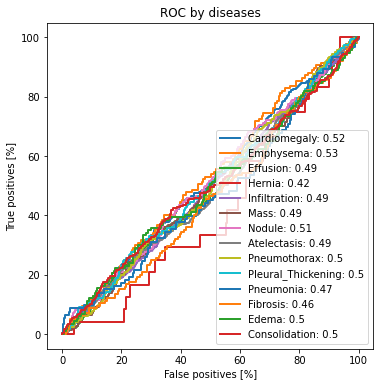

In [ ]:
###########################
## Partially finetuned - Multilabel 
###########################

models_to_use = ['ReNet50', 'AlexNet', 'VGG16', 'GoogLeNet']

model = model_architecture(model = models_to_use[3], H = H, W = W, 
                           dropout = dropout, fine_tune_at = 249, 
                           classification_type = 'multilabel')

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.00001), 
              loss = loss_fn,
              metrics = [tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.AUC()])

# es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

history = model.fit(train_set_excl, validation_data=val_set_excl, epochs = epochs, verbose = 1, batch_size=batch_size)

plotting_(history, model, test_set_excl, classification_type = 'multilabel')

# save weights
model.save_weights('trained_models/checkpoints/googlenet_partially_finetuned_wts_multi')
# save models
model.save('trained_models/googleNet_partially_finetuned_multi.h5')

### Binary classification

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 sequential_4 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 73728)             0         
                                                                 
 dropout_4 (Dropout)         (None, 73728)             0         
                                                                 
 dense_6 (Dense)             (None, 50)                3686450   
                                                                 
 dense_7 (Dense)             (None, 20)                1020

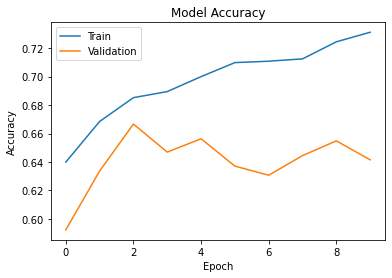

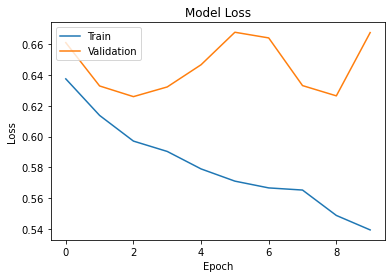

/tmp/ipykernel_44/2273223313.py:50: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_test_proba = model.predict_generator(test_set, steps = len(test_set))


Test scores:
              precision    recall  f1-score   support

           0       0.65      0.43      0.52      1205
           1       0.37      0.59      0.45       680

    accuracy                           0.49      1885
   macro avg       0.51      0.51      0.48      1885
weighted avg       0.55      0.49      0.49      1885



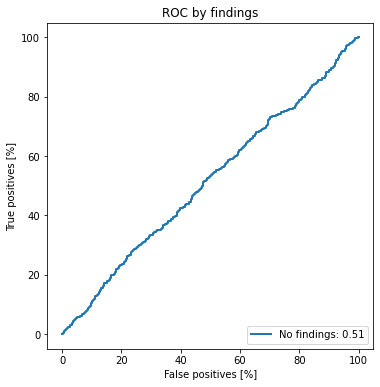

In [ ]:
# ###########################
# ## ALL FINE TUNED - Binary 
# ###########################

models_to_use = ['ReNet50', 'AlexNet', 'VGG16', 'GoogLeNet']

model = model_architecture(model = models_to_use[3], H = H, W = W, 
                           dropout = dropout, fine_tune_at = 0, 
                           classification_type = 'binary')

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.00001), 
              loss='binary_crossentropy', 
              metrics = [tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.AUC()])

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

history = model.fit(train_set, validation_data=val_set, epochs = epochs, verbose = 1, batch_size=batch_size, callbacks=[es])

plotting_(history, classification_type = 'binary')

# save weights
model.save_weights('trained_models/checkpoints/googlenet_all_finetuned_wts_binary')
# save models
model.save('trained_models/googleNet_all_finetuned_binary.h5')

# 4 - Results and Limitations

## 4.1 Findings


- From the results above, we can see that across all four pretrained and
fine tuned supervised models, the same three diseases, Mass, Nodule and
Atelectasis have F1 scores that beat the naive baseline. This is not the
case for other diseases. Also, we can see that the macro average is not
being much different across our models.

- By looking at the AUC scores, we can see that some models perform better
than others in specific diseases. For instance, GoogleNet gets the highest
AUC for Mass, Pneumothorax and Plural Thickening, Pneumonia and
Fibrosis. Whereas VGG does better on Cariomegaly, Effusion, Hernia,
Infiltration, Nodule and Atelectasis.

- Which model should hence be used in a medical setting? Should our
decisions be based on F1 scores or AUC score? In case a patient is to
be diagnosed, we cannot know in advance if they have a specific disease,
hence even if we wanted to we wouldn’t be able to pick the one that
performs ’best’ in terms of AUC on a disease. Ideally, we want a model
that does well everywhere. In this sense, we would like a model that is
able to perceive as many diseases a possible, in our case, this is GoogleNet,
based on its 6 non-zero F1 scores. On the other hand, Resnet, Alexnet
and VGG have only 3 or 4 non-zero F1 scores.



## 4.2 Limitations & difficulties 

- The image labels are NLP extracted so there would be some erroneous labels but the NLP labelling accuracy is estimated to be >90%.

- Another limitation is that our model is trained on limited data, so the accuracy of our results can be improved. While we have adopted transfer learning from ImageNet, X-Rays are not similar to images from ImageNet, and training with sufficient data will be essential to produce good predictions. 

- Furtheremore, our multiclass label prediction on 14 diseases are based onimbalanced classes. We have sparse data in certain diseases such as in pnuemonia and hernia which represents less than 1% of the images which limits our performances for these classes. 

- Furthermore, we have split up our tasks into two tasks of binary classification of with/without finding, and a multilabel classification of diseases. Our first task will only allow clinicians to predict if a X-ray is indicative of a disease but it would not be able to pinpoint which disease it is. This makes it challenging for the interpretation of GradCam where irregularities could be in different region of interest for different diseases. 

- Our second task will only allow clinicians to predict the presence of specific diseases conditional on the fact that we already know that the patient with this X-ray has a finding. In a practical setting, clinicians would only order an X-ray if they suspect the presence of diseases but cannot confirm it. If they can already confirm, they would likely already know the type of disease. This limits the usefulness of the second task. It however could allow clinicians to discover secondary diseases not related to initial diagnosis. 

- In this dataset, the same patient can be visited multiple times. This means
that the same patient will have had several X-rays. In order not to learn
idiosyncrasies of a specific person, the dataset is split between train and
test so that images of the same patients will not be both on test and
train, but rather in only one of that. Meaning, patients will be different
between train and test. This however does not seem to happen between
train and validation. To us it seems that in validation and train there
can be cross over of images of the same visited patience. Given this, we
assume that another reason of our unsatisfying test scores might also be
that we might be learning idiosyncrasies of specific patiences, hence this
might have affected how this does not generalize well to the test dataset.

- One difficulty that we face are the lack of computational power to handle this data. This contributed to our limitation on not training on enough data, and also limits our ability run scenario analysis with different parameters for model fine-tuning. Here we are using only 10 000 images instead of 100 000. Also, we are running 10 epochs per model. Contrarily, the paper of reference that published the dataset is using the entire dataset, at least 10 000 epochs per model, and 4 NVIDIA Titan X GPUs. In light of this, we assume that with more computational power, the sky could be the only limit and we are aware that our results are far away from being ready to be used in an actual clinical setting.




## 4.3 Future work

Firstly, we would want to train our model with the complete data. This would allow our models to learn and its performance to improve. 

With a better model, we will want to dif further into our interpretation. We would like to compare our heatmaps against bounding boxes with a predefined threhold for pixel intensities. We can then compare this to the labelled boxes to the labelled box in the data. 

We want to look into other approahes to dealing with imbalanced data. Ideally, we hope to collect more data resulting in less imbalanced classes. Should this not be possible, we would like to explore upsampling which synthetically generates data points. 

We are interested to look into other self unsupervised approaches such as MoCo v3. 

# 5 - 209 Part

For the 209 part of this project we decided to explore a method of *unsupervised* or *self supervised* learning methods.

A recent paper that proposes a unsupervised learning architecture is **SimCLRv2** [1]. Self-learning can be very useful to improve accuracy in several realms of computer vision where it is more expensive or where it is very difficult to label additional data to train larger models. This is specifically very well suited to the problem we have at hand. In medical applications, getting high-quality labels requires careful annotation by clinicians. Hence, we might have access to many medical images with no labelling and only to a subset with labels. 

 
SimCLRv2  consists in **3 stages**. 

* The first stage is at the left in the image below. The first stage consists in training a  self-supervised architecture with no labels with a contrastive loss. Constrastive loss is based on the concept of 'clustering together' embeddings coming from the same image, and 'pushing away' embeddinggs coming from different images. In this first stage the amount of unlabelled data would be more than the amount of labeled data used in stage two. In the first stage SimCLRv2 utilizes random crop, color distortion and Gaussian Blur as data augmentation.

* The second stage is at the middle in the image below. This second stage consists of taking the weights of the architecture trained in stage 1, loading them up to a new architecture of the same kind, and fine tuning these weights with now the labeled data. SimCLR version 1 used to freeze the entire projection head in this stage. One of the novelties of SimCLR version 2 is to not freeze the entire projection head, but to rather freeze the first and last layer and to continue to fine tune the layer in the middle.

* The third stage is at the right in the image below. The third stage consists in distillation, i.e. having a teacher and a student networks. The student network loss will be referring for its 'y true' to the teacher labels, instead to the real labels. The teacher is the fine tuned network resulting from stage 2.

[1] Big Self-Supervised Models are Strong Semi-Supervised Learners https://arxiv.org/pdf/2006.10029.pdf 

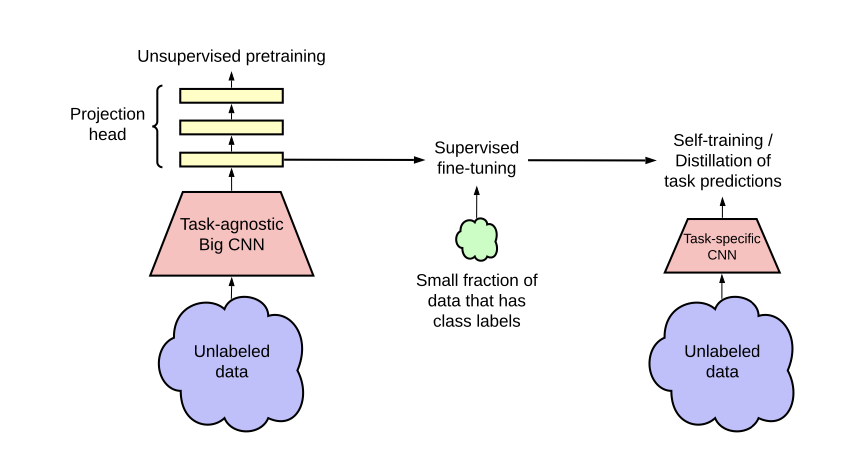

## SimCLRv2 in our code

In our code we are going to implement only stage 1 and stage 2 explained from above in interest of time. 

* In the stage 1 we are implementing the architecture as similarly as possible as the paper illustrated. The paper uses a Resnet152 as encoder before the projection head. However, because of computational and memory constraints, we have used a ResNet50.  Hence, we have ResNet50 architecture that is being followed by a projection head consisting of three dense layers. We are adding a final dense layer to do classification for 14 diseases ( we are excluding the 'No Finding' layer). In this step we are using 5000 unlabelled images with constrastive loss. Similarly to the paper, we apply some data augmentation in stage 1, these include random brightness, random contrast and random saturation.

* After this, we save those weights and reinstantiate the same architecture again, with those weights. In this second step we are using only 500. Here we have tried also to freeze the first and last layer of the projection head to as truthfully as possible follow the original paper.





## Installing libraries and utils functions for SimCLRv2

In [ ]:
! pip install imutils

In [ ]:
# Other imports
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import matplotlib.pyplot as plt
from imutils import paths
from tqdm import tqdm

import tensorflow as tf
import numpy as np
import cv2

# Random seed fixation
tf.random.set_seed(666)
np.random.seed(666)

In [ ]:
import tensorflow as tf
from tensorflow.python.client import device_lib

print("Tensorflow version  :", tf.__version__)
print("All physical devices:",tf.config.list_physical_devices())
print("Num GPUs Available  : ", len(tf.config.list_physical_devices('GPU')))
tf.test.gpu_device_name()

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np 
import pandas as pd 
from tensorflow.python.ops.gen_math_ops import TruncateMod


df = pd.read_csv('Data_Entry_2017_v2020.csv')
diseases = df['Finding Labels'].apply(lambda labels: labels.split('|')).explode().unique() 
df['finding_labels_split'] = df['Finding Labels'].apply(lambda labels: labels.split('|'))

df_encoded = pd.concat([df, df['Finding Labels'].str.get_dummies(sep='|')], axis=1)
df_encoded[diseases] = df_encoded[diseases].fillna(1).astype(int)

Tensorflow version  : 2.8.0
All physical devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs Available  :  1


In [ ]:
BATCH_SIZE = 16
NUM_CLASSES = 14
batch_size = 16

In [ ]:
# Augmentation utilities (differs from the original implementation)
# Referred from: https://arxiv.org/pdf/2002.05709.pdf (Appendxi A 
# corresponding GitHub: https://github.com/google-research/simclr/)

class CustomAugment(object):
    def __call__(self, sample):        
        # Random flips
        sample = self._random_apply(tf.image.flip_left_right, sample, p=0.5)
        
        # Randomly apply transformation (color distortions) with probability p.
        sample = self._random_apply(self._color_jitter, sample, p=0.8)
        sample = self._random_apply(self._color_drop, sample, p=0.2)

        return sample

    def _color_jitter(self, x, s=1):
        # one can also shuffle the order of following augmentations
        # each time they are applied.
        x = tf.image.random_brightness(x, max_delta=0.8*s)
        x = tf.image.random_contrast(x, lower=1-0.8*s, upper=1+0.8*s)
        x = tf.image.random_saturation(x, lower=1-0.8*s, upper=1+0.8*s)
        x = tf.image.random_hue(x, max_delta=0.2*s)
        x = tf.clip_by_value(x, 0, 1)
        return x
    
    def _color_drop(self, x):
        x = tf.image.rgb_to_grayscale(x)
        x = tf.tile(x, [1, 1, 1, 3])
        return x
    
    def _random_apply(self, func, x, p):
        return tf.cond(
          tf.less(tf.random.uniform([], minval=0, maxval=1, dtype=tf.float32),
                  tf.cast(p, tf.float32)),
          lambda: func(x),
          lambda: x)


In [ ]:
data_augmentation = Sequential([Lambda(CustomAugment())])


## Replication of SimCLRv2 Architecture

In [ ]:
# Architecture utils
def get_resnet_simclr(hidden_1, hidden_2, hidden_3, pretrained = False):
    base_model = tf.keras.applications.ResNet50(include_top=False, weights=None, input_shape=(224, 224, 3))
    # base_model = tf.keras.applications.ResNet152(include_top=False, weights=None, input_shape=(224, 224, 3))

    base_model.trainable = True
    inputs = Input((224, 224, 3))
    h = base_model(inputs, training=True)
    h = GlobalAveragePooling2D()(h)

    projection_1 = Dense(hidden_1)(h)
    projection_1 = Activation("relu")(projection_1)
    projection_2 = Dense(hidden_2)(projection_1)
    projection_2 = Activation("relu")(projection_2)
    projection_3 = Dense(hidden_3)(projection_2)

    outputs = Dense(NUM_CLASSES, activation = 'sigmoid')(projection_3)
    resnet_simclr = Model(inputs, outputs) 

    # resnet_simclr = Model(inputs, projection_3)

    return resnet_simclr

## Contrastive Loss

In [ ]:
!wget https://raw.githubusercontent.com/sthalles/SimCLR-tensorflow/master/utils/helpers.py
!wget https://raw.githubusercontent.com/sthalles/SimCLR-tensorflow/master/utils/losses.py

--2022-05-07 17:53:55--  https://raw.githubusercontent.com/sthalles/SimCLR-tensorflow/master/utils/helpers.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 891 [text/plain]
Saving to: ‘helpers.py.13’

helpers.py.13       100%[===================>]     891  --.-KB/s    in 0s      

2022-05-07 17:53:55 (31.5 MB/s) - ‘helpers.py.13’ saved [891/891]

--2022-05-07 17:53:56--  https://raw.githubusercontent.com/sthalles/SimCLR-tensorflow/master/utils/losses.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 891 [text/plain]
Saving to: 

In [ ]:
from losses import _dot_simililarity_dim1 as sim_func_dim1, _dot_simililarity_dim2 as sim_func_dim2


In [ ]:
def get_negative_mask(batch_size):
    # return a mask that removes the similarity score of equal/similar images.
    # this function ensures that only distinct pair of images get their similarity scores
    # passed as negative examples
    negative_mask = np.ones((batch_size, 2 * batch_size), dtype=bool)
    for i in range(batch_size):
        negative_mask[i, i] = 0
        negative_mask[i, i + batch_size] = 0
    return tf.constant(negative_mask)


def gaussian_filter(v1, v2):
    k_size = int(v1.shape[1] * 0.1)  # kernel size is set to be 10% of the image height/width
    gaussian_ope = GaussianBlur(kernel_size=k_size, min=0.1, max=2.0)
    [v1, ] = tf.py_function(gaussian_ope, [v1], [tf.float32])
    [v2, ] = tf.py_function(gaussian_ope, [v2], [tf.float32])
    return v1, v2

## Training function for SimCLRv2

In [ ]:
@tf.function
def train_step(xis, xjs, model, optimizer, criterion, temperature):
    negative_mask = get_negative_mask(xis.shape[0])

    with tf.GradientTape() as tape:
        zis = model(xis)
        zjs = model(xjs)

        # normalize projection feature vectors
        zis = tf.math.l2_normalize(zis, axis=1)
        zjs = tf.math.l2_normalize(zjs, axis=1)

        l_pos = sim_func_dim1(zis, zjs)
        l_pos = tf.reshape(l_pos, (xis.shape[0], 1))
        l_pos /= temperature

        negatives = tf.concat([zjs, zis], axis=0)

        loss = 0

        for positives in [zis, zjs]:
            l_neg = sim_func_dim2(positives, negatives)

            labels = tf.zeros(xis.shape[0], dtype=tf.int32)

            l_neg = tf.boolean_mask(l_neg, negative_mask)
            l_neg = tf.reshape(l_neg, (xis.shape[0], -1))
            l_neg /= temperature

            logits = tf.concat([l_pos, l_neg], axis=1) 
            loss += criterion(y_pred=logits, y_true=labels)

        loss = loss / (2 * BATCH_SIZE)

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    return loss


In [ ]:
def train_simclr(model, dataset, optimizer, criterion,
                 temperature=0.1, epochs=100):
    step_wise_loss = []
    epoch_wise_loss = []

    for epoch in tqdm(range(epochs)):
        print('EPOCH:', epoch + 1)
        for idx in tqdm(range(len(dataset))):
            image_batch, _ = next(dataset)
            a = data_augmentation(image_batch)
            b = data_augmentation(image_batch)

            loss = train_step(a, b, model, optimizer, criterion, temperature)
            step_wise_loss.append(loss)
        # print("am i done?")
        epoch_wise_loss.append(np.mean(step_wise_loss))
#         wandb.log({"nt_xentloss": np.mean(step_wise_loss)})
        
        # if epoch % 10 == 0:
        print("epoch: {} loss: {:.3f}".format(epoch + 1, np.mean(step_wise_loss)))

    return epoch_wise_loss, model


## Data Generators for 5000 and 500 images

In [ ]:
list(diseases)

['Cardiomegaly',
 'Emphysema',
 'Effusion',
 'No Finding',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Atelectasis',
 'Pneumothorax',
 'Pleural_Thickening',
 'Pneumonia',
 'Fibrosis',
 'Edema',
 'Consolidation']

In [ ]:
diseases_ = list(diseases)
diseases_ = np.delete(diseases, 3)
diseases_

array(['Cardiomegaly', 'Emphysema', 'Effusion', 'Hernia', 'Infiltration',
       'Mass', 'Nodule', 'Atelectasis', 'Pneumothorax',
       'Pleural_Thickening', 'Pneumonia', 'Fibrosis', 'Edema',
       'Consolidation'], dtype=object)

In [ ]:
diseases_

array(['Cardiomegaly', 'Emphysema', 'Effusion', 'Hernia', 'Infiltration',
       'Mass', 'Nodule', 'Atelectasis', 'Pneumothorax',
       'Pleural_Thickening', 'Pneumonia', 'Fibrosis', 'Edema',
       'Consolidation'], dtype=object)

In [ ]:

datagen = ImageDataGenerator(rescale=1./255.,
                             validation_split=0.25)
    
val_set_5000 = datagen.flow_from_dataframe(df_encoded[df_encoded['No Finding']==0].iloc[:5000], 
                            # directory='images/', 
                            directory = 'images_small_train_val', 
                            target_size=(224,224), 
                            x_col='Image Index',
                            y_col=list(diseases_),
                            class_mode='raw',
                            batch_size=BATCH_SIZE,
                            subset="validation"
                           )

train_set_5000 = datagen.flow_from_dataframe(df_encoded[df_encoded['No Finding']==0].iloc[:5000], 
                            # directory='images/', 
                            directory = 'images_small_train_val', 
                            target_size=(224,224), 
                            x_col='Image Index',
                            y_col=list(diseases_),
                            class_mode='raw',
                            batch_size=BATCH_SIZE,
                            subset="training"
                           )


test_set_5000 = datagen.flow_from_dataframe(df_encoded[df_encoded['No Finding']==0].iloc[:5000], 
                            # directory='images/', 
                            directory = 'images_small_test', 
                            target_size=(224,224), 
                            x_col='Image Index',
                            y_col=list(diseases_),
                            class_mode='raw',
                            batch_size=BATCH_SIZE,
                           )

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1418 invalid image filename(s) in x_col="Image Index". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 895 validated image filenames.
Found 2687 validated image filenames.
Found 1418 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 3582 invalid image filename(s) in x_col="Image Index". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
val_set_500 = datagen.flow_from_dataframe(df_encoded[df_encoded['No Finding']==0].iloc[:500], 
                            # directory='images/', 
                            directory = 'images_small_train_val', 
                            target_size=(224,224), 
                            x_col='Image Index',
                            y_col=list(diseases_),
                            class_mode='raw',
                            batch_size=BATCH_SIZE,
                            subset="validation"
                           )

train_set_500 = datagen.flow_from_dataframe(df_encoded[df_encoded['No Finding']==0].iloc[:500], 
                            # directory='images/', 
                            directory = 'images_small_train_val', 
                            target_size=(224,224), 
                            x_col='Image Index',
                            y_col=list(diseases_),
                            class_mode='raw',
                            batch_size=BATCH_SIZE,
                            subset="training"
                           )

test_set_500 = datagen.flow_from_dataframe(df_encoded[df_encoded['No Finding']==0].iloc[:500], 
                            # directory='images/', 
                            directory = 'images_small_test', 
                            target_size=(224,224), 
                            x_col='Image Index',
                            y_col=list(diseases_),
                            class_mode='raw',
                            batch_size=BATCH_SIZE,
                           )

Found 72 validated image filenames.
Found 218 validated image filenames.
Found 210 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 210 invalid image filename(s) in x_col="Image Index". These filename(s) will be ignored.
  .format(n_invalid, x_col)
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 290 invalid image filename(s) in x_col="Image Index". These filename(s) will be ignored.
  .format(n_invalid, x_col)


## STAGE 1 - Unsupervised pre-training

**IF YOU ARE RUNNING THIS AGAIN:** please be aware that to make this work, in case you get errors, you might have to run from the '209 Part: SimCLRv2' section again. 


In this section we are performing the first stage of self-supervised pretrained learning. After this, we are going to store these weights and use them for the supervised learning stage 2 of fine tuning.

  0%|          | 0/30 [00:00<?, ?it/s]

EPOCH: 1



  3%|▎         | 1/30 [00:36<17:32, 36.29s/it]

epoch: 1 loss: 3.438
EPOCH: 2



  7%|▋         | 2/30 [00:59<13:17, 28.50s/it]

epoch: 2 loss: 3.435
EPOCH: 3



 10%|█         | 3/30 [01:22<11:42, 26.04s/it]

epoch: 3 loss: 3.434
EPOCH: 4



 13%|█▎        | 4/30 [01:45<10:47, 24.91s/it]

epoch: 4 loss: 3.434
EPOCH: 5



 17%|█▋        | 5/30 [02:08<10:05, 24.23s/it]

epoch: 5 loss: 3.433
EPOCH: 6



 20%|██        | 6/30 [02:31<09:32, 23.84s/it]

epoch: 6 loss: 3.433
EPOCH: 7



 23%|██▎       | 7/30 [02:54<09:02, 23.57s/it]

epoch: 7 loss: 3.433
EPOCH: 8



 27%|██▋       | 8/30 [03:18<08:36, 23.48s/it]

epoch: 8 loss: 3.433
EPOCH: 9



 30%|███       | 9/30 [03:41<08:10, 23.34s/it]

epoch: 9 loss: 3.433
EPOCH: 10



 33%|███▎      | 10/30 [04:03<07:44, 23.21s/it]

epoch: 10 loss: 3.433
EPOCH: 11



 37%|███▋      | 11/30 [04:27<07:19, 23.16s/it]

epoch: 11 loss: 3.433
EPOCH: 12



 40%|████      | 12/30 [04:49<06:55, 23.06s/it]

epoch: 12 loss: 3.433
EPOCH: 13



 43%|████▎     | 13/30 [05:12<06:31, 23.02s/it]

epoch: 13 loss: 3.433
EPOCH: 14



 47%|████▋     | 14/30 [05:35<06:08, 23.00s/it]

epoch: 14 loss: 3.433
EPOCH: 15



 50%|█████     | 15/30 [05:58<05:43, 22.93s/it]

epoch: 15 loss: 3.433
EPOCH: 16



 53%|█████▎    | 16/30 [06:21<05:20, 22.90s/it]

epoch: 16 loss: 3.433
EPOCH: 17



 57%|█████▋    | 17/30 [06:44<04:58, 22.98s/it]

epoch: 17 loss: 3.433
EPOCH: 18



 60%|██████    | 18/30 [07:07<04:36, 23.06s/it]

epoch: 18 loss: 3.433
EPOCH: 19



 63%|██████▎   | 19/30 [07:30<04:14, 23.10s/it]

epoch: 19 loss: 3.433
EPOCH: 20



 67%|██████▋   | 20/30 [07:54<03:51, 23.13s/it]

epoch: 20 loss: 3.433
EPOCH: 21



 70%|███████   | 21/30 [08:17<03:28, 23.16s/it]

epoch: 21 loss: 3.433
EPOCH: 22



 73%|███████▎  | 22/30 [08:40<03:05, 23.25s/it]

epoch: 22 loss: 3.433
EPOCH: 23



 77%|███████▋  | 23/30 [09:04<02:42, 23.23s/it]

epoch: 23 loss: 3.433
EPOCH: 24



 80%|████████  | 24/30 [09:26<02:18, 23.07s/it]

epoch: 24 loss: 3.433
EPOCH: 25



 83%|████████▎ | 25/30 [09:49<01:55, 23.07s/it]

epoch: 25 loss: 3.433
EPOCH: 26



 87%|████████▋ | 26/30 [10:12<01:32, 23.10s/it]

epoch: 26 loss: 3.433
EPOCH: 27



 90%|█████████ | 27/30 [10:36<01:09, 23.15s/it]

epoch: 27 loss: 3.433
EPOCH: 28



 93%|█████████▎| 28/30 [10:59<00:46, 23.19s/it]

epoch: 28 loss: 3.433
EPOCH: 29



 97%|█████████▋| 29/30 [11:22<00:23, 23.10s/it]

epoch: 29 loss: 3.433
EPOCH: 30



100%|██████████| 30/30 [11:45<00:00, 23.51s/it]


epoch: 30 loss: 3.433


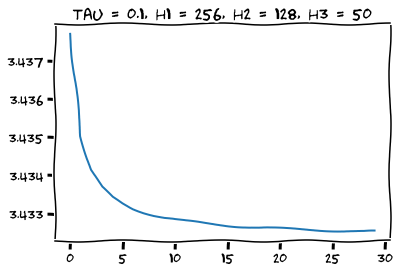

In [ ]:
criterion = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, 
                                                          reduction=tf.keras.losses.Reduction.SUM)
decay_steps = 3000
lr_decayed_fn = tf.keras.experimental.CosineDecay(
    initial_learning_rate=0.1, decay_steps=decay_steps)
optimizer = tf.keras.optimizers.SGD(lr_decayed_fn)

resnet_simclr_2 = get_resnet_simclr(256, 128, 50)

epoch_wise_loss, resnet_simclr  = train_simclr(resnet_simclr_2, train_set_5000, optimizer, criterion,
                #  temperature=0.1, epochs=10)
                 temperature=0.1, epochs=30)


with plt.xkcd():
    plt.plot(epoch_wise_loss)
    plt.title("tau = 0.1, h1 = 256, h2 = 128, h3 = 50")
    plt.show()

# save weights
resnet_simclr_2.save_weights('./checkpoints/second_run_final_simclr_step_1')
# save models
resnet_simclr_2.save('./checkpoints/second_run_final_simclr_step_1.h5')

  0%|          | 0/10 [00:00<?, ?it/s]

EPOCH: 1



 10%|█         | 1/10 [14:33<2:11:01, 873.54s/it]

epoch: 1 loss: 3.435
EPOCH: 2



 20%|██        | 2/10 [14:56<49:45, 373.16s/it]  

epoch: 2 loss: 3.434
EPOCH: 3



 30%|███       | 3/10 [15:19<24:52, 213.21s/it]

epoch: 3 loss: 3.433
EPOCH: 4



 40%|████      | 4/10 [15:42<13:48, 138.09s/it]

epoch: 4 loss: 3.433
EPOCH: 5



 50%|█████     | 5/10 [16:05<08:02, 96.52s/it] 

epoch: 5 loss: 3.433
EPOCH: 6



 60%|██████    | 6/10 [16:27<04:45, 71.43s/it]

epoch: 6 loss: 3.433
EPOCH: 7



 70%|███████   | 7/10 [16:50<02:46, 55.52s/it]

epoch: 7 loss: 3.433
EPOCH: 8



 80%|████████  | 8/10 [17:13<01:30, 45.14s/it]

epoch: 8 loss: 3.433
EPOCH: 9



 90%|█████████ | 9/10 [17:36<00:38, 38.16s/it]

epoch: 9 loss: 3.433
EPOCH: 10



100%|██████████| 10/10 [17:58<00:00, 107.90s/it]


epoch: 10 loss: 3.433


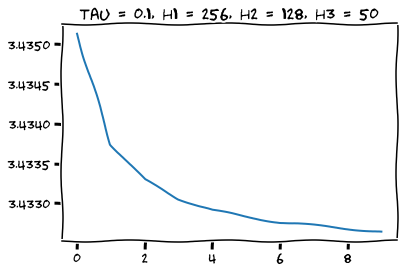

In [ ]:
criterion = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, 
                                                          reduction=tf.keras.losses.Reduction.SUM)
decay_steps = 3000
lr_decayed_fn = tf.keras.experimental.CosineDecay(
    initial_learning_rate=0.1, decay_steps=decay_steps)
optimizer = tf.keras.optimizers.SGD(lr_decayed_fn)

resnet_simclr_2 = get_resnet_simclr(256, 128, 50)

epoch_wise_loss, resnet_simclr  = train_simclr(resnet_simclr_2, train_set_5000, optimizer, criterion,
                #  temperature=0.1, epochs=10)
                 temperature=0.1, epochs=10)


with plt.xkcd():
    plt.plot(epoch_wise_loss)
    plt.title("tau = 0.1, h1 = 256, h2 = 128, h3 = 50")
    plt.show()

## Saving weights of Stage 1 and loading model for Stage 2

Here we are saving the weights from the model above and transferring them to a new model to fine tune.


In [ ]:
# save weights
resnet_simclr_2.save_weights('./checkpoints/final_simclr_step_1')
# save models
resnet_simclr_2.save('./checkpoints/final_simclr_step_1.h5')

In [ ]:

simclr_step2 = get_resnet_simclr(256, 128, 50)
# Restore the weights
simclr_step2.load_weights('./checkpoints/final_simclr_step_1')



## Freezing layer 1 and 3 of projection head 



In [ ]:
simclr_step2 = get_resnet_simclr(256, 128, 50)
# Restore the weights
simclr_step2.load_weights('./checkpoints/final_simclr_step_1')


simclr_step2.layers[3].trainable = False

simclr_step2.layers[7].trainable = False

In [ ]:
simclr_step2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 256)               524544    
                                                                 
 activation_96 (Activation)  (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                           

In [ ]:
count_ = 0
for layer in simclr_step2.layers:
  print(count_)
  count_ +=1
  print(layer.trainable)

0
True
1
True
2
True
3
False
4
True
5
True
6
True
7
False
8
True


## Setting new positive and negative weights for the weighted loss to be used in Stage 2

In [ ]:
diseases_excl = ['Cardiomegaly', 'Emphysema', 'Effusion', 'Hernia',
       'Infiltration', 'Mass', 'Nodule', 'Atelectasis', 'Pneumothorax',
       'Pleural_Thickening', 'Pneumonia', 'Fibrosis', 'Edema',
       'Consolidation']

In [ ]:
#Calculate weights
positive_weights = {}
negative_weights = {}
num_data_points = 500
df_with_finding = df_encoded[df_encoded['No Finding']==0]
num_images = num_data_points

for c in list(diseases_excl):
    positive_weights[c] = num_images/(np.count_nonzero(df_with_finding.iloc[:num_data_points][c]==1))
    negative_weights[c] = num_images/(np.count_nonzero(df_with_finding.iloc[:num_data_points][c]==0))
print(positive_weights)
print(negative_weights)

{'Cardiomegaly': 6.097560975609756, 'Emphysema': 13.513513513513514, 'Effusion': 2.9585798816568047, 'Hernia': 55.55555555555556, 'Infiltration': 3.0864197530864197, 'Mass': 14.285714285714286, 'Nodule': 12.820512820512821, 'Atelectasis': 5.2631578947368425, 'Pneumothorax': 12.5, 'Pleural_Thickening': 17.24137931034483, 'Pneumonia': 50.0, 'Fibrosis': 15.625, 'Edema': 16.129032258064516, 'Consolidation': 11.904761904761905}
{'Cardiomegaly': 1.1961722488038278, 'Emphysema': 1.079913606911447, 'Effusion': 1.5105740181268883, 'Hernia': 1.0183299389002036, 'Infiltration': 1.4792899408284024, 'Mass': 1.075268817204301, 'Nodule': 1.0845986984815619, 'Atelectasis': 1.2345679012345678, 'Pneumothorax': 1.0869565217391304, 'Pleural_Thickening': 1.0615711252653928, 'Pneumonia': 1.0204081632653061, 'Fibrosis': 1.0683760683760684, 'Edema': 1.0660980810234542, 'Consolidation': 1.091703056768559}


In [ ]:


def loss_fn(y_true,y_pred):
    y_true = tf.cast(y_true, tf.float32)
    loss = 0
    for i, (k, v) in enumerate(positive_weights.items()):
      loss += -K.mean((positive_weights[k]*y_true[:,i]*K.log(y_pred[:,i]) + negative_weights[k]*(1-y_true[:,i])*K.log(1-y_pred[:,i])))
    return loss

## STAGE 2 - Supervised fine tuning

* In this stage, which for us is the final one as we are not pursuing with distillation, we are loading the weights of the previous model and continuing to train them with a smaller subset of labelled images. 

* We can see that even with a smaller subset of data, we are still getting comparable results to some of the models above.

In [ ]:
simclr_step2 = get_resnet_simclr(256, 128, 50)
# # Restore the weights
simclr_step2.load_weights('./checkpoints/final_simclr_step_1')

In [ ]:
simclr_step2.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_10  (None, 2048)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_40 (Dense)            (None, 256)               524544    
                                                                 
 activation_114 (Activation)  (None, 256)              0         
                                                                 
 dense_41 (Dense)            (None, 128)               32896     
                                                          

In [ ]:
def plotting_(history, classification_type, model, test_set_excl ):

  #  "Accuracy"
  plt.plot(history.history['binary_accuracy'])
  plt.plot(history.history['val_binary_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  # "Loss"
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  # y_pred_train = model.predict_generator(train_set, steps = len(train_set))
  # y_pred_train = y_pred_train.round()
  # y_train = train_set.labels
  # print('Train scores')
  # print(f'{classification_report(y_train, y_pred_train)}')

  plt.figure(figsize=(6,6))
  if classification_type == 'multilabel': 
    y_pred_test_proba = model.predict_generator(test_set_excl, steps = len(test_set_excl))
    y_pred_test = y_pred_test_proba.round()
    y_test = test_set_excl.labels
    print(f'Test scores:')
    print(f'{classification_report(y_test, y_pred_test)}')
    
    for i in range(y_test.shape[1]):
      plot_roc(diseases_excl[i], y_test[:,i], y_pred_test_proba[:,i])
    plt.title('ROC by diseases')
    plt.legend(loc='lower right');
  else: 
    y_pred_test_proba = model.predict_generator(test_set, steps = len(test_set))
    y_pred_test = y_pred_test_proba.round()
    y_test = test_set.labels
    print(f'Test scores:')
    print(f'{classification_report(y_test, y_pred_test)}')

    plot_roc('No findings', y_test, y_pred_test_proba)
    plt.title('ROC by findings')
    plt.legend(loc='lower right');

Epoch 1/40
14/14 [==============================] - 8s 189ms/step - loss: 6.8945 - binary_accuracy: 0.5098 - auc_25: 0.5256 - val_loss: 6.1697 - val_binary_accuracy: 0.5119 - val_auc_25: 0.5311
Epoch 2/40
14/14 [==============================] - 1s 92ms/step - loss: 5.4031 - binary_accuracy: 0.5098 - auc_25: 0.5423 - val_loss: 4.8383 - val_binary_accuracy: 0.5119 - val_auc_25: 0.5522
Epoch 3/40
14/14 [==============================] - 1s 92ms/step - loss: 4.1971 - binary_accuracy: 0.5098 - auc_25: 0.5509 - val_loss: 3.8273 - val_binary_accuracy: 0.5119 - val_auc_25: 0.5392
Epoch 4/40
14/14 [==============================] - 1s 90ms/step - loss: 3.6394 - binary_accuracy: 0.5098 - auc_25: 0.5471 - val_loss: 3.2127 - val_binary_accuracy: 0.5119 - val_auc_25: 0.5492
Epoch 5/40
14/14 [==============================] - 1s 92ms/step - loss: 2.9592 - binary_accuracy: 0.5098 - auc_25: 0.5534 - val_loss: 2.7549 - val_binary_accuracy: 0.5119 - val_auc_25: 0.5446
Epoch 6/40
14/14 [================

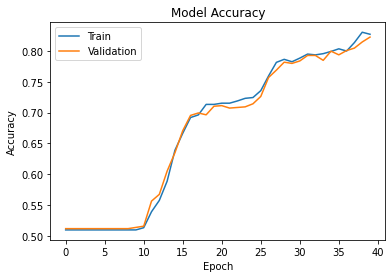

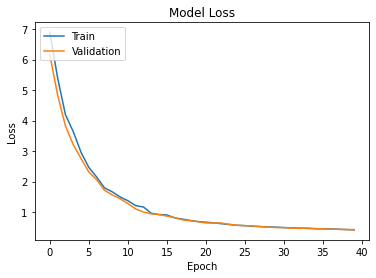

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Test scores:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        73
           3       0.00      0.00      0.00         8
           4       1.00      0.03      0.05        78
           5       0.00      0.00      0.00        13
           6       0.01      1.00      0.02         2
           7       0.17      0.19      0.18        31
           8       0.00      0.00      0.00        23
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         5
          11       0.50      0.14      0.22         7
          12       0.00      0.00      0.00        27
          13       0.00      0.00      0.00        28

   micro avg       0.04      0.03      0.03       376
   macro avg       0.12      0.10      0.03       376
weighted avg       0.23      0.03      0.03       376
 samples avg 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


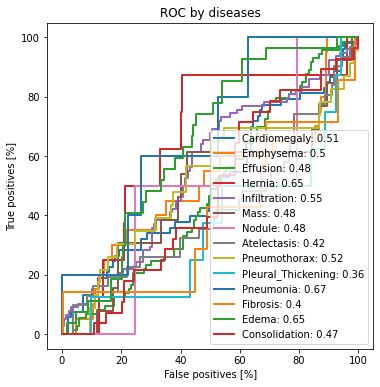

In [ ]:
simclr_step2 = get_resnet_simclr(256, 128, 50)
# # Restore the weights
simclr_step2.load_weights('./checkpoints/final_simclr_step_1')

simclr_step2.layers[3].trainable = False

simclr_step2.layers[7].trainable = False

batch_size = 16
epochs = 10

simclr_step2.compile(optimizer=tf.keras.optimizers.Adam(0.00001), 
              loss='binary_crossentropy', 
              # loss = loss_fn,
              # loss=getting_weighted_loss(positive_weights, negative_weights), 
              metrics = [tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.AUC()])

history = simclr_step2.fit(train_set_500, validation_data=val_set_500, epochs = 40, verbose = 1, batch_size=batch_size)

plotting_(history, 'multilabel', simclr_step2 ,test_set_500)

## Stage 2 with weights from stage 1 with 30 epochs

Epoch 1/40
14/14 [==============================] - 9s 196ms/step - loss: 5.5820 - binary_accuracy: 0.5413 - auc_26: 0.4614 - val_loss: 5.2328 - val_binary_accuracy: 0.5258 - val_auc_26: 0.4207
Epoch 2/40
14/14 [==============================] - 1s 93ms/step - loss: 4.5132 - binary_accuracy: 0.5413 - auc_26: 0.4594 - val_loss: 4.2797 - val_binary_accuracy: 0.5258 - val_auc_26: 0.4016
Epoch 3/40
14/14 [==============================] - 1s 92ms/step - loss: 3.6688 - binary_accuracy: 0.5413 - auc_26: 0.4694 - val_loss: 3.4021 - val_binary_accuracy: 0.5258 - val_auc_26: 0.4283
Epoch 4/40
14/14 [==============================] - 1s 94ms/step - loss: 2.9345 - binary_accuracy: 0.5413 - auc_26: 0.4759 - val_loss: 2.6828 - val_binary_accuracy: 0.5258 - val_auc_26: 0.4501
Epoch 5/40
14/14 [==============================] - 1s 94ms/step - loss: 2.3894 - binary_accuracy: 0.5413 - auc_26: 0.4900 - val_loss: 2.2183 - val_binary_accuracy: 0.5258 - val_auc_26: 0.4577
Epoch 6/40
14/14 [================

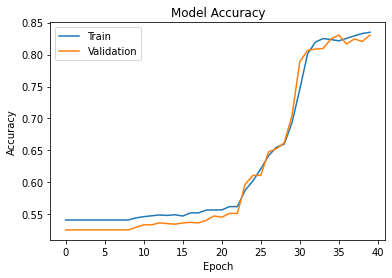

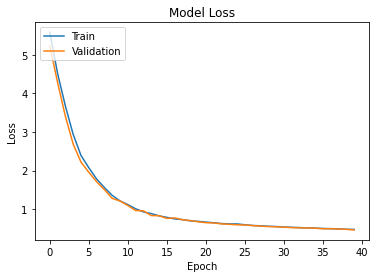

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Test scores:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        73
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        78
           5       0.00      0.00      0.00        13
           6       0.01      1.00      0.02         2
           7       0.00      0.00      0.00        31
           8       0.00      0.00      0.00        23
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00        27
          13       0.00      0.00      0.00        28

   micro avg       0.01      0.01      0.01       376
   macro avg       0.00      0.07      0.00       376
weighted avg       0.00      0.01      0.00       376
 samples avg 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


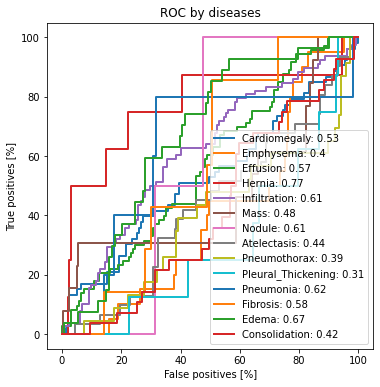

In [ ]:
simclr_step2 = get_resnet_simclr(256, 128, 50)
# Restore the weights
simclr_step2.load_weights('./checkpoints/second_run_final_simclr_step_1')


simclr_step2.layers[3].trainable = False

simclr_step2.layers[7].trainable = False

batch_size = 16
epochs = 10

simclr_step2.compile(optimizer=tf.keras.optimizers.Adam(0.00001), 
              loss='binary_crossentropy', 
              # loss = loss_fn,
              # loss=getting_weighted_loss(positive_weights, negative_weights), 
              metrics = [tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.AUC()])

history = simclr_step2.fit(train_set_500, validation_data=val_set_500, epochs = 40, verbose = 1, batch_size=batch_size)

plotting_(history, 'multilabel', simclr_step2 ,test_set_500)

## Discussion about SimCLRv2 Results:


*  For this part of the project, Stage 1 (Self supervised pretraining) has been performed with 5000 unlabelled images (2687 images for training, 895 for validation, 1418 for test). Stage 2 (supervised fine tuning) has been performed with 500 labelled images (218 for training, 72 for validation, 210 for test). The results on the test data set seem to be satisfying, and as future work we would suggest performing this on even more images for self-supervised pretraining. 
    

*  As future work, we would also suggest to perform the entire architecture of SimCLRv2 with also distillation. We think that performing the entire architecture with more images would probably unleash more results and extract the value that unlabelled medical data can provide.
    

## SimCLRv2 Broader Impact

* We are very happy to have explored a self-supervised method for 209 and consider this to be a strong instrument to utilize in the realm of medical data, where labelling can be time-expensive. 

* This method could unleash the power of significance of several unlabelled medical data - as this method leverages it in a 'pre training' fashion, to then boost the power of even smaller amounts of data in its fine tuning.

# 6 Interpretation

## 6.1 Approach - GradCam

With the addition of transitional and global pooling layers in our architecture, we implement Grad-CAM, a visualization method for understanding how our model localizes regions of interest in our x-ray images. 

We choose Grad-CAM for its generalizability across a range of neural architectures. Grad-CAM has the same basic idea behind CAM: we want to exploit the spatial information that is preserved through convolutional layers, in order to understand which parts of an input image were important for a classification decision.

In this section, we illustrate our model's evaluation on a few test images. Since it is more interesting to look at disease localization, we will specifically choose images from the disease classes. Based on the above model performance, we noticed that the model performs particularly well on the Infiltrate label. 

Finally, we will compare the regions activated by Grad-CAM to the bounding box of disease localization. Since we have a subset of images which also contain bounding box information of the labelled disease, using a visualization method like Grad-CAM can help us explain where the model is looking when making a prediction. In a clinical setting, this is useful because it provides an interpretation of the model's performance, as well as its limitations, and how to improve the model.

Our method for grad-CAM is implemented as the class `My_GradCAM`.





## 6.2 Results

We demonstrate Grad-CAM results on a sample image with the 'Atelectasis' and 'Effusion' label based on our Resnet Model for multilabel classification. We picked these labels as the precision/recall/F1 score is the best for these two classes. 

Atelectasis is a collapse of part or all of a lung. In an X-ray with Atelectasis, you would expect that there will be bands of linear opacity in both lower lungs. The bounding box highlights these the region above the opacity in lower lungs. In an X-Ray with effusion, there will be an abnormal accumulation of fluid in the plural cavity. The small bounding box highlighted the accumulation of fluid. 

When comparing the visualization heatmap with the bounding box, we do observe some overlap - the model's heatmap reveals activity, in the whole lungs region. 
Qualitiatively, this suggests that our model is picking out some features in the image that corroborate with the disease.

Due to our model performance, our GradCam is however not showing an obvious region of interest. Our GradCam is however showing that the region above shoulders are not of interest for both classes, which is right.

In [ ]:
# Guide: https://pyimagesearch.com/2020/03/09/grad-cam-visualize-class-activation-maps-with-keras-tensorflow-and-deep-learning/
# Imports
import os
import time
import re
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import matplotlib.cm as cm
from PIL import Image
from tensorflow.keras.models import Model

#  from google.colab.patches import cv2_imshow
%matplotlib inline

In [ ]:
# data
df = pd.read_csv('Data_Entry_2017_v2020.csv')
diseases = df['Finding Labels'].apply(lambda labels: labels.split('|')).explode().unique() 
df['finding_labels_split'] = df['Finding Labels'].apply(lambda labels: labels.split('|'))

df_encoded = pd.concat([df, df['Finding Labels'].str.get_dummies(sep='|')], axis=1)
df_encoded[diseases] = df_encoded[diseases].fillna(1).astype(int)

# bounding box images
boxes = pd.read_csv('BBox_List_2017.csv')
boxes = boxes.rename(columns={'Bbox [x':'X', 'y': 'Y', 'w':'W', 'h]':'H'})

import matplotlib.patches as patches

In [ ]:
class My_GradCAM:
    def __init__(self, model, classIdx, inner_model=None, layerName=None):
        self.model = model
        self.classIdx = classIdx
        self.inner_model = inner_model
        if self.inner_model == None:
            self.inner_model = model
        self.layerName = layerName 

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
          # check to see if the layer has a 4D output
          if len(layer.output_shape) == 4:
            return layer.name
        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")
      
    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model

        # gradModel = Model(
        # 	inputs=[self.model.inputs],
        # 	outputs=[self.model.get_layer(self.layerName).output,
        # 		self.model.output])

        gradModel = tf.keras.models.Model(
            inputs=[self.inner_model.inputs],
            outputs=[self.inner_model.get_layer(self.layerName).output,
              self.inner_model.output]) 
      
        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
          # cast the image tensor to a float-32 data type, pass the
          # image through the gradient model, and grab the loss
          # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]
        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)
      
      # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))
        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")
        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
        colormap=cv2.COLORMAP_VIRIDIS):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)


In [ ]:
# load model
model = tf.keras.models.load_model('trained_models_final/Resnet_all_finetuned_multi.h5', compile=False)
model.summary()
for layer in model.layers:
    print(layer.name)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                           

In [ ]:
model.get_layer('resnet50').summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
# get output of one test images
at_example = boxes[boxes['Finding Label'] == 'Atelectasis'].iloc[8]

img = Image.open("images_small_test/" + at_example['Image Index'])
label = at_example['Finding Label']

img_tensor = tf.convert_to_tensor(np.array(img), tf.float32)
img_tensor = tf.expand_dims(img_tensor, axis=0)
img_tensor = img_tensor/255

# use the network to make predictions on the input image and find
# the class label index with the largest corresponding probability
preds = model.predict(img_tensor)
i = np.argmax(preds[0])

cam = My_GradCAM(model, None, inner_model=model.get_layer("resnet50"), layerName="conv5_block3_3_conv")
heatmap = cam.compute_heatmap(img_tensor)

# resize the resulting heatmap to the original input image dimensions
# and then overlay heatmap on top of the image
(heatmap, output) = cam.overlay_heatmap(heatmap, np.array(img), alpha=0.5)

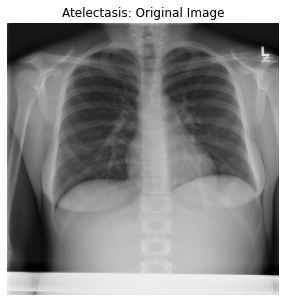

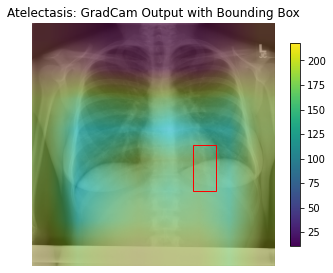

In [ ]:
# display heatmap overlayed on image
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(img)
ax.set_title("Atelectasis: Original Image")
ax.axis('off')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(5,5))
# Create a Rectangle patch - for bounding box
rect = patches.Rectangle((at_example['X']/4, at_example['Y']/4), at_example['W']/4, at_example['H']/4, linewidth=1, edgecolor='r', facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)
a = ax.imshow(output)
ax.set_title("Atelectasis: GradCam Output with Bounding Box")
ax.axis('off')
plt.colorbar(a,shrink=0.6)
plt.tight_layout()
plt.show()



In [ ]:
boxes['Finding Label'].unique()

array(['Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltrate', 'Mass',
       'Nodule', 'Pneumonia', 'Pneumothorax'], dtype=object)

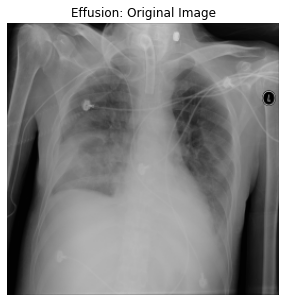

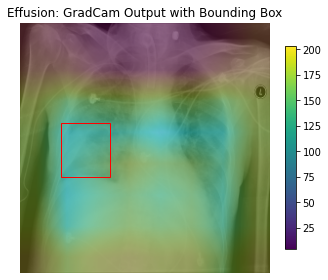

In [ ]:
# get output of one test images
in_example = boxes[boxes['Finding Label'] == 'Effusion'].iloc[9]

img = Image.open("images_small_test/" + in_example['Image Index'])
label = in_example['Finding Label']

img_tensor = tf.convert_to_tensor(np.array(img), tf.float32)
img_tensor = tf.expand_dims(img_tensor, axis=0)
img_tensor = img_tensor/255

# use the network to make predictions on the input image and find
# the class label index with the largest corresponding probability
preds = model.predict(img_tensor)
i = np.argmax(preds[0])

cam = My_GradCAM(model, None, inner_model=model.get_layer("resnet50"), layerName="conv5_block3_3_conv")
heatmap = cam.compute_heatmap(img_tensor)

# resize the resulting heatmap to the original input image dimensions
# and then overlay heatmap on top of the image
(heatmap, output) = cam.overlay_heatmap(heatmap, np.array(img), alpha=0.5)

# display heatmap overlayed on image
fig, ax = plt.subplots(1, 1,figsize=(5,5))
ax.imshow(img)
ax.axis('off')
ax.set_title("Effusion: Original Image")
plt.show()

fig, ax = plt.subplots(1, 1,figsize=(5,5))
# Create a Rectangle patch - for bounding box
rect = patches.Rectangle((in_example['X']/4, in_example['Y']/4), in_example['W']/4, in_example['H']/4, linewidth=1, edgecolor='r', facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)
a = ax.imshow(output)
ax.set_title("Effusion: GradCam Output with Bounding Box")
ax.axis('off')
plt.colorbar(a,shrink=0.6)
plt.tight_layout()
plt.show()



# Overall Final Remarks - Results 



In this project we are exploring classification through deep learning methods of 15 classes: 14 diseases and a label of no disease being present.We have decided to instead to a classificaion of 15 classes, to separate the problem in two:

* The first part would be to classify whether a patient has a disease or not - hence a binary classification.

* The second part is, in case a patient is to be found with a disease, to then determine which disease this is. In this, the model does multi label classification with 14 clases.

* Given that there is imbalance  between classes in both cases, we opted to use a weighted loss. 

* Overall, the intent was to replicate and follow the structure of the paper 'ChestX-ray8: Hospital-scale Chest X-ray Database and Benchmarks on Weakly-Supervised Classification and Localization of Common Thorax Diseases'[1]. Nonetheless, they indicate that they used 4 Titan X GPUs and that trained their ResNet50 for about 10 000 epochs on the entire dataset. Given our computational resources, we had to choose to worl with only 10 000 images, and 10 epochs per model. Given this, our results do not match theirs, but we also are hopeful that with more computational power our models would provide solid performance as well. 


[1] https://arxiv.org/pdf/1705.02315.pdf

# Literature

[1] Jia Deng, Wei Dong, Richard Socher, Li-Jia Li, Kai Li, and Li Fei-Fei. Imagenet: A large-
scale hierarchical image database. In 2009 IEEE Conference on Computer Vision and Pattern
Recognition, pages 248–255, 2009.

[2] Kaiming He, Xiangyu Zhang, Shaoqing Ren, and Jian Sun. Deep residual learning for image
recognition, 2015.


[3] Gao Huang, Zhuang Liu, Laurens Van Der Maaten, and Kilian Q. Weinberger. Densely
connected convolutional networks. In 2017 IEEE Conference on Computer Vision and Pattern
Recognition (CVPR), pages 2261–2269, 2017.


[4] Alex Krizhevsky, Ilya Sutskever, and Geoffrey E Hinton. Imagenet classification with deep
convolutional neural networks. In F. Pereira, C.J. Burges, L. Bottou, and K.Q. Weinberger,
editors, Advances in Neural Information Processing Systems, volume 25. Curran Associates,
Inc., 2012.


[5] Laszlo Papp, Clemens P. Spielvogel, Ivo Rausch, Marcus Hacker, and Thomas Beyer. Personal-
izing medicine through hybrid imaging and medical big data analysis. Frontiers in Physics, 6,
2018.
9


[6] Pranav Rajpurkar, Jeremy Irvin, Robyn L Ball, Kaylie Zhu, Brandon Yang, Hershel Mehta, Tony
Duan, Daisy Ding, Aarti Bagul, Curtis P Langlotz, et al. Deep learning for chest radiograph
diagnosis: A retrospective comparison of the chexnext algorithm to practicing radiologists.
PLoS medicine, 15(11):e1002686, 2018.

[7] Olga Russakovsky, Jia Deng, Hao Su, Jonathan Krause, Sanjeev Satheesh, Sean Ma, Zhiheng
Huang, Andrej Karpathy, Aditya Khosla, Michael Bernstein, Alexander C. Berg, and Li Fei-Fei.
Imagenet large scale visual recognition challenge, 2014.

[8] Ramprasaath R. Selvaraju, Michael Cogswell, Abhishek Das, Ramakrishna Vedantam, Devi
Parikh, and Dhruv Batra. Grad-cam: Visual explanations from deep networks via gradient-based
localization, 2016.

[9] Karen Simonyan and Andrew Zisserman. Very deep convolutional networks for large-scale
image recognition, 2014.

[10] Christian Szegedy, Wei Liu, Yangqing Jia, Pierre Sermanet, Scott Reed, Dragomir Anguelov,
Dumitru Erhan, Vincent Vanhoucke, and Andrew Rabinovich. Going deeper with convolutions,
2014.

[11] Xiaosong Wang, Yifan Peng, Le Lu, Zhiyong Lu, Mohammadhadi Bagheri, and Ronald M.
Summers. Chestx-ray8: Hospital-scale chest x-ray database and benchmarks on weakly-
supervised classification and localization of common thorax diseases. 2017 IEEE Conference
on Computer Vision and Pattern Recognition (CVPR), Jul 2017.

[12] Chen, Ting, Simon Kornblith, Kevin Swersky, Mohammad Norouzi, and Geoffrey Hinton. “Big Self-Supervised Models Are Strong Semi-Supervised Learners.” ArXiv:2006.10029 [Cs, Stat], October 25, 2020.
